In [149]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

from gensim.models import KeyedVectors
from gensim.models import word2vec
import gensim

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

#Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import pickle

from sklearn.utils import resample

%run my_functions.ipynb

In [150]:
import keras
from keras.preprocessing import text, sequence
from keras.layers import Input, Dense, LSTM, Embedding, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam, rmsprop
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model

from gensim.models import KeyedVectors

from sklearn.utils import class_weight

In [151]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)

In [7]:
X = df.tokenized_tweet
y = df.label

In [8]:
list(df.tokenized_tweet)

[['sad',
  'to',
  'see',
  'the',
  'scenes',
  'of',
  'hooligans',
  'pre',
  'engrus',
  'why',
  'spoil',
  'the',
  'pay',
  'euro'],
 ['gooddyeyoung',
  'yoyoyo',
  'super',
  'happy',
  'to',
  'be',
  'apa',
  'of',
  'the',
  'movement'],
 ['queen',
  'evil',
  's',
  'bihday',
  'lnic',
  'lnicjustanevilbday',
  'bihday',
  'suit',
  'evil',
  'love',
  'yolo',
  'stoops',
  'seriously'],
 ['you',
  'might',
  'be',
  'a',
  'libtard',
  'if',
  'libtard',
  'sjw',
  'liberal',
  'politics'],
 ['what', 'are', 'your', 'goals', 'find', 'out', 'here', 'smile'],
 ['retweets', 'nuascannan'],
 ['a', 'classic', 'trump', 'follower'],
 ['in',
  'the',
  'mixture',
  'of',
  'emotions',
  'here',
  's',
  'a',
  'one',
  'from',
  'the',
  'weekend',
  'w',
  'thx',
  'pride'],
 ['the',
  'meps',
  'bear',
  'that',
  'travelled',
  'to',
  'sandy',
  'hook',
  'in',
  'with',
  'hope',
  'that',
  'another',
  'gun',
  'massacre',
  'would',
  'never',
  'occur',
  'again'],
 ['just'

In [9]:
X_token_list = list(df.tokenized_tweet)
# X_token_sumlist = sum(X_token_list,[])
# X_unique_tokens = set(X_token_sumlist)

In [12]:
# print('The unique number of words in the dataset is: {}'.format(len(X_unique_tokens)))

In [13]:
#list(df.no_hash_tweet)

['sad to see the scenes of hooligans pre engrus why spoil the pay euro',
 'gooddyeyoung yoyoyo super happy to be apa of the movement',
 'queen evil s bihday lnic lnicjustanevilbday bihday suit evil love yolo stoops seriously',
 'you might be a libtard if libtard sjw liberal politics',
 'what are your goals find out here smile',
 'retweets nuascannan',
 'a classic trump follower',
 'in the mixture of emotions here s a one from the weekend w thx pride',
 'the meps bear that travelled to sandy hook in with hope that another gun massacre would never occur again',
 'just because it affected her son son s abuse prompts angela kennedy to change sex ed stance via',
 'thomas always says i live in a dream world no this is real life it just might seem like a dream to others  life blessed',
 'when the local library tries to charge you once again for fees you ve already paid twice before ineedtosavethereceipt frustrated',
 'cia ncs sockpuppetarmy hbgary troll snowden amp their sop is logical fallac

In [ ]:
max(len(tweet) for tweet in df.no_hash_tweet)

In [116]:
max(len(tweet) for tweet in df.tokenized_tweet)

39

In [128]:
longest_sentence = 0  #how long the longest sentence is
longest_sentence_index = 0  #where the longest sentence is located

for index_, sentence in enumerate(df.no_hash_tweet):  #cycle through each sentence/tweet and keep track of its index
    if len(sentence.split()) > longest_sentence:  #if the length of that sentence/tweet is longer than any previous ones...
        longest_sentence = len(sentence.split())  #overwrite our variable with the new longest length
        longest_sentence_index = index_  #overwrite where the new longest sentence is (its index)

        print('longest sentence is {}'.format(longest_sentence))  #print the outputs
print('At index {}'.format(longest_sentence_index))

longest sentence is 14
longest sentence is 15
longest sentence is 19
longest sentence is 25
longest sentence is 27
longest sentence is 28
longest sentence is 32
longest sentence is 33
longest sentence is 39
At index 30477


In [15]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(list(df.no_hash_tweet))

In [16]:
print(tokenizer.word_counts)

OrderedDict([('sad', 429), ('to', 9866), ('see', 762), ('the', 10238), ('scenes', 11), ('of', 4261), ('hooligans', 5), ('pre', 42), ('engrus', 8), ('why', 505), ('spoil', 5), ('pay', 278), ('euro', 167), ('gooddyeyoung', 2), ('yoyoyo', 1), ('super', 115), ('happy', 1706), ('be', 2490), ('apa', 13), ('movement', 18), ('queen', 53), ('evil', 29), ('s', 3595), ('bihday', 866), ('lnic', 3), ('lnicjustanevilbday', 3), ('suit', 17), ('love', 2762), ('yolo', 18), ('stoops', 1), ('seriously', 47), ('you', 5949), ('might', 223), ('a', 6540), ('libtard', 152), ('if', 697), ('sjw', 74), ('liberal', 99), ('politics', 129), ('what', 1175), ('are', 1894), ('your', 1702), ('goals', 64), ('find', 303), ('out', 950), ('here', 518), ('smile', 724), ('retweets', 10), ('nuascannan', 6), ('classic', 19), ('trump', 407), ('follower', 11), ('in', 4704), ('mixture', 2), ('emotions', 43), ('one', 797), ('from', 1058), ('weekend', 597), ('w', 203), ('thx', 20), ('pride', 46), ('meps', 2), ('bear', 248), ('that'

In [17]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'i': 3, 'a': 4, 'you': 5, 'and': 6, 'in': 7, 'for': 8, 'of': 9, 'is': 10, 'my': 11, 'it': 12, 's': 13, 'love': 14, 'this': 15, 'on': 16, 'with': 17, 'be': 18, 't': 19, 'day': 20, 'that': 21, 'all': 22, 'so': 23, 'are': 24, 'me': 25, 'amp': 26, 'happy': 27, 'your': 28, 'at': 29, 'have': 30, 'we': 31, 'am': 32, 'can': 33, 'just': 34, 'will': 35, 'when': 36, 'not': 37, 'do': 38, 'u': 39, 'what': 40, 'life': 41, 'like': 42, 'time': 43, 'm': 44, 'but': 45, 'today': 46, 'from': 47, 'up': 48, 'now': 49, 'new': 50, 'thankful': 51, 'out': 52, 'as': 53, 'positive': 54, 'get': 55, 'was': 56, 'people': 57, 'about': 58, 'how': 59, 'our': 60, 'bihday': 61, 'good': 62, 'by': 63, 'no': 64, 'they': 65, 'one': 66, 'see': 67, 'more': 68, 'smile': 69, 'if': 70, 'don': 71, 'go': 72, 'who': 73, 'want': 74, 'father': 75, 'he': 76, 'take': 77, 'work': 78, 'healthy': 79, 're': 80, 'fun': 81, 'weekend': 82, 'an': 83, 'summer': 84, 'has': 85, 'there': 86, 'or': 87, 'make': 88, 'family': 89, '

In [18]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 37794 unique tokens


In [19]:
sequences = tokenizer.texts_to_sequences(df['no_hash_tweet'])

In [20]:
sequences

[[122, 2, 67, 1, 3004, 9, 5338, 1048, 3813, 102, 5339, 1, 189, 311],
 [9779, 14883, 443, 27, 2, 18, 2614, 9, 1, 2053],
 [858, 1400, 13, 61, 7619, 7620, 61, 2140, 1400, 14, 2054, 14884, 957],
 [5, 233, 18, 4, 336, 70, 336, 635, 501, 392],
 [40, 24, 28, 719, 175, 52, 95, 69],
 [3240, 4671],
 [4, 1978, 128, 3005],
 [7, 1, 9780, 9, 1030, 95, 13, 4, 66, 47, 1, 82, 254, 1897, 978],
 [1,
  9781,
  215,
  21,
  6253,
  2,
  3006,
  3814,
  7,
  17,
  202,
  21,
  197,
  591,
  2479,
  192,
  125,
  6254,
  185],
 [34,
  156,
  12,
  2055,
  126,
  518,
  518,
  13,
  2141,
  9782,
  9783,
  14885,
  2,
  282,
  346,
  2615,
  7621,
  180],
 [3815,
  147,
  412,
  3,
  151,
  7,
  4,
  458,
  112,
  64,
  15,
  10,
  307,
  41,
  12,
  34,
  233,
  1979,
  42,
  4,
  458,
  2,
  479,
  41,
  203],
 [36,
  1,
  947,
  2480,
  4170,
  2,
  2346,
  5,
  617,
  185,
  8,
  5340,
  5,
  146,
  403,
  1181,
  2056,
  240,
  14886,
  1591],
 [14887,
  9784,
  14888,
  14889,
  1898,
  14890,
  26,
  1

In [21]:
sorted(sequences[0])

[1, 1, 2, 9, 67, 102, 122, 189, 311, 1048, 3004, 3813, 5338, 5339]

In [22]:
df.no_hash_tweet[0]

'sad to see the scenes of hooligans pre engrus why spoil the pay euro'

In [23]:
for word, idx in word_index.items():     
    if idx in  sequences[0]:
        print(word, idx)

the 1
to 2
of 9
see 67
why 102
sad 122
pay 189
euro 311
pre 1048
scenes 3004
engrus 3813
hooligans 5338
spoil 5339


In [87]:
# How to get vector representation based on its index. Example:
print(tokenizer.index_word[4])
RNN_w2v_model[tokenizer.index_word[4]]

a


array([-1.0186473 ,  0.4185874 ,  0.03718451,  0.13528629, -0.3650397 ,
       -0.24703623,  0.13331461,  0.4074878 , -0.35624728,  0.17563938,
        0.00712319,  0.01918386,  0.2879449 , -0.01450821,  0.17457229,
        0.50118345,  0.09059349,  0.44188038,  0.31068277,  0.4914089 ,
       -0.38725615,  0.44174948,  0.5374021 , -0.39309922, -0.08533598,
       -0.3093519 , -0.06766933,  0.25305778, -0.07284808, -0.09308872,
       -0.589171  , -0.36277574,  0.891046  ,  0.505584  ,  0.33271816,
        0.09240952,  0.17265312,  0.47411552, -0.3658286 ,  0.67331785,
       -0.05973436, -0.15029033, -0.32715532, -1.2932861 , -0.4935069 ,
        0.5618585 ,  0.10268716, -0.34561443, -0.14907531, -0.57659984,
       -0.24560836,  0.02173907,  0.2904836 ,  0.09267468,  0.8894296 ,
        0.4317911 , -0.01069878,  0.29918158, -0.36767432,  0.09429818,
       -0.23425491, -0.63184214, -0.14301509, -0.01182534, -0.32139218,
        0.48877037,  0.41033775,  0.18384059,  0.05987484, -0.04

In [25]:
sequences

[[122, 2, 67, 1, 3004, 9, 5338, 1048, 3813, 102, 5339, 1, 189, 311],
 [9779, 14883, 443, 27, 2, 18, 2614, 9, 1, 2053],
 [858, 1400, 13, 61, 7619, 7620, 61, 2140, 1400, 14, 2054, 14884, 957],
 [5, 233, 18, 4, 336, 70, 336, 635, 501, 392],
 [40, 24, 28, 719, 175, 52, 95, 69],
 [3240, 4671],
 [4, 1978, 128, 3005],
 [7, 1, 9780, 9, 1030, 95, 13, 4, 66, 47, 1, 82, 254, 1897, 978],
 [1,
  9781,
  215,
  21,
  6253,
  2,
  3006,
  3814,
  7,
  17,
  202,
  21,
  197,
  591,
  2479,
  192,
  125,
  6254,
  185],
 [34,
  156,
  12,
  2055,
  126,
  518,
  518,
  13,
  2141,
  9782,
  9783,
  14885,
  2,
  282,
  346,
  2615,
  7621,
  180],
 [3815,
  147,
  412,
  3,
  151,
  7,
  4,
  458,
  112,
  64,
  15,
  10,
  307,
  41,
  12,
  34,
  233,
  1979,
  42,
  4,
  458,
  2,
  479,
  41,
  203],
 [36,
  1,
  947,
  2480,
  4170,
  2,
  2346,
  5,
  617,
  185,
  8,
  5340,
  5,
  146,
  403,
  1181,
  2056,
  240,
  14886,
  1591],
 [14887,
  9784,
  14888,
  14889,
  1898,
  14890,
  26,
  1

In [129]:
padded_data = sequence.pad_sequences(sequences, maxlen=39, padding='post')

In [130]:
padded_data

array([[  122,     2,    67, ...,     0,     0,     0],
       [ 9779, 14883,   443, ...,     0,     0,     0],
       [  858,  1400,    13, ...,     0,     0,     0],
       ...,
       [  360,  1069,    47, ...,     0,     0,     0],
       [  720,   113,    47, ...,     0,     0,     0],
       [    1,  2559,  3760, ...,     0,     0,     0]], dtype=int32)

In [132]:
padded_data[1]

array([ 9779, 14883,   443,    27,     2,    18,  2614,     9,     1,
        2053,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)

In [131]:
# labels = np.array(labels)
print('Shape of data tensor:', padded_data.shape)
# print('Shape of label tensor:', df.class.shape)

Shape of data tensor: (31962, 39)


In [133]:
num_words = 37795
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    print(word, i)
    if word in RNN_w2v_model.wv.vocab:
        embedding_matrix[i] = RNN_w2v_model.wv.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

the 1
to 2
i 3
a 4
you 5
and 6
in 7
for 8
of 9
is 10
my 11
it 12
s 13
love 14
this 15
on 16
with 17
be 18
t 19
day 20
that 21
all 22
so 23
are 24
me 25
amp 26
happy 27
your 28
at 29
have 30
we 31
am 32
can 33
just 34
will 35
when 36
not 37
do 38
u 39
what 40
life 41
like 42
time 43
m 44
but 45
today 46
from 47
up 48
now 49
new 50
thankful 51
out 52
as 53
positive 54
get 55
was 56
people 57
about 58
how 59
our 60
bihday 61
good 62
by 63
no 64
they 65
one 66
see 67
more 68
smile 69
if 70
don 71
go 72
who 73
want 74
father 75
he 76
take 77
work 78
healthy 79
re 80
fun 81
weekend 82
an 83
summer 84
has 85
there 86
or 87
make 88
family 89
got 90
us 91
days 92
friday 93
best 94
here 95
great 96
his 97
way 98
need 99
friends 100
beautiful 101
why 102
bull 103
only 104
going 105
first 106
really 107
their 108
wait 109
morning 110
music 111
world 112
back 113
ur 114
tomorrow 115
week 116
know 117
some 118
been 119
very 120
cute 121
sad 122
orlando 123
fathersday 124
never 125
her 126
think 127


anime 1278
bro 1279
reasons 1280
tour 1281
bar 1282
entire 1283
deal 1284
euros 1285
product 1286
ignorance 1287
kitty 1288
english 1289
religion 1290
near 1291
plan 1292
songs 1293
flagday 1294
em 1295
ugh 1296
ireland 1297
passion 1298
eating 1299
worry 1300
creative 1301
muslims 1302
turned 1303
idwp 1304
lets 1305
key 1306
begin 1307
straight 1308
gamedev 1309
texas 1310
ma 1311
animal 1312
ya 1313
land 1314
bored 1315
between 1316
definitely 1317
sadly 1318
allow 1319
front 1320
losing 1321
apparently 1322
lie 1323
colombia 1324
shootings 1325
yum 1326
europe 1327
taken 1328
match 1329
project 1330
schools 1331
faces 1332
lack 1333
powerful 1334
calgary 1335
filled 1336
stress 1337
bigot 1338
user 1339
humpday 1340
natural 1341
heaven 1342
brilliant 1343
stream 1344
lebron 1345
played 1346
watched 1347
thats 1348
spent 1349
shi 1350
ripchristinagrimmie 1351
round 1352
greatest 1353
speech 1354
studio 1355
released 1356
michael 1357
science 1358
winter 1359
dude 1360
shoot 1361
pri

mama 2129
peeps 2130
becoming 2131
cinema 2132
nazi 2133
michelle 2134
terrorists 2135
countries 2136
sydney 2137
headed 2138
zen 2139
suit 2140
abuse 2141
points 2142
mommy 2143
bloody 2144
whe 2145
resources 2146
smoke 2147
buddy 2148
hahaha 2149
pleasure 2150
voting 2151
turkey 2152
dm 2153
rainy 2154
funeral 2155
interest 2156
brave 2157
mirror 2158
reunited 2159
bitter 2160
excitement 2161
idiots 2162
proof 2163
waking 2164
fb 2165
trade 2166
character 2167
cross 2168
theme 2169
venue 2170
fraud 2171
comics 2172
episodes 2173
raw 2174
amsterdam 2175
coldplay 2176
boring 2177
colorful 2178
worldwide 2179
sa 2180
military 2181
com 2182
wins 2183
leeds 2184
jobsearch 2185
jersey 2186
notmypresident 2187
socialmedia 2188
multiple 2189
jews 2190
ally 2191
tan 2192
tiny 2193
path 2194
kitten 2195
excuse 2196
groom 2197
british 2198
nationalbestfriendsday 2199
actress 2200
commercial 2201
teeth 2202
village 2203
excit 2204
hashtag 2205
honest 2206
blast 2207
periscope 2208
cancer 2209
se

vlog 2995
longhair 2996
presentation 2997
medical 2998
vehicle 2999
atlanta 3000
pull 3001
documentary 3002
position 3003
scenes 3004
follower 3005
sandy 3006
rule 3007
opened 3008
gr 3009
jocox 3010
fault 3011
whisky 3012
bottles 3013
craft 3014
prepare 3015
wellbeing 3016
bonding 3017
active 3018
pair 3019
throwing 3020
atherapy 3021
musictherapy 3022
loose 3023
quickly 3024
oakland 3025
steal 3026
herbalremedies 3027
sunrise 3028
rapist 3029
lush 3030
saved 3031
perhaps 3032
outrage 3033
dogsofinstagram 3034
dev 3035
andrew 3036
metal 3037
closing 3038
ridiculous 3039
crafts 3040
ups 3041
obamas 3042
sexual 3043
instamoment 3044
pac 3045
todays 3046
giveaway 3047
mid 3048
kejriwal 3049
range 3050
putin 3051
madness 3052
premier 3053
opposition 3054
retweeted 3055
experiences 3056
puts 3057
italian 3058
grey 3059
language 3060
flights 3061
monkey 3062
criminal 3063
pops 3064
desire 3065
focused 3066
aka 3067
salute 3068
accessories 3069
houston 3070
premium 3071
yyc 3072
afford 3073


grad 3851
virginia 3852
childish 3853
advantage 3854
destination 3855
missyou 3856
jam 3857
included 3858
ideal 3859
dressed 3860
saturdaymorning 3861
lab 3862
profit 3863
saturdaynight 3864
purple 3865
conspiracy 3866
wildlife 3867
financial 3868
answers 3869
nah 3870
taylor 3871
reinventimpossible 3872
netherlands 3873
strawberry 3874
spoilt 3875
fri 3876
warns 3877
decisions 3878
kindle 3879
spirituality 3880
shopthemint 3881
argentina 3882
palette 3883
elections 3884
xboxone 3885
danger 3886
ordinary 3887
encouragement 3888
carrying 3889
booking 3890
coolestlifehack 3891
convention 3892
cologne 3893
coast 3894
suppoive 3895
eh 3896
sauce 3897
citation 3898
tattoosleeves 3899
oppounities 3900
mma 3901
onto 3902
dallas 3903
arriving 3904
germanyhetalia 3905
receiving 3906
daddysgirl 3907
tournament 3908
marine 3909
christianity 3910
hippie 3911
nowhere 3912
contain 3913
trucks 3914
hottweets 3915
tower 3916
fixed 3917
mindsconsole 3918
nonsense 3919
owners 3920
marseille 3921
fate 39

messy 4651
epcot 4652
oldest 4653
fearless 4654
ku 4655
patio 4656
hav 4657
sum 4658
mars 4659
reflection 4660
apaheid 4661
gosh 4662
perfectly 4663
thug 4664
tolerance 4665
thousand 4666
mydubai 4667
wave 4668
ski 4669
thevoice 4670
nuascannan 4671
gentleman 4672
brutality 4673
users 4674
vacay 4675
pays 4676
winterfashion 4677
oxford 4678
walker 4679
tasty 4680
shown 4681
edits 4682
seed 4683
feelthebern 4684
bubble 4685
browns 4686
modelling 4687
ie 4688
damage 4689
pipe 4690
narrative 4691
gearing 4692
jk 4693
brokenhea 4694
hosting 4695
mtb 4696
historic 4697
hitler 4698
haiku 4699
captain 4700
traveler 4701
peru 4702
asleep 4703
separate 4704
rooms 4705
carnival 4706
heels 4707
personality 4708
lovehim 4709
shore 4710
charlotte 4711
ye 4712
compare 4713
guest 4714
aint 4715
boe 4716
nowlinkup 4717
comeonengland 4718
policebrutality 4719
impoance 4720
alhamdulillah 4721
settle 4722
fridaynight 4723
reader 4724
saterday 4725
thread 4726
fatty 4727
taylorswift 4728
lifehacks 4729
hy

protesters 5530
caer 5531
impressed 5532
sixty 5533
mill 5534
thesis 5535
bots 5536
icymi 5537
hongkong 5538
wcw 5539
vocal 5540
hsp 5541
victorious 5542
carlos 5543
nicola 5544
lions 5545
deciding 5546
trained 5547
prospect 5548
sailing 5549
crude 5550
embarrassing 5551
ableism 5552
committee 5553
core 5554
despise 5555
causes 5556
ella 5557
dump 5558
stood 5559
seasonal 5560
disorder 5561
presence 5562
properly 5563
slammed 5564
goldenretriever 5565
mod 5566
overall 5567
ojb 5568
mayor 5569
flowerlove 5570
dec 5571
bake 5572
drumpf 5573
dignity 5574
indieauthor 5575
saint 5576
hawaiian 5577
teenager 5578
doggie 5579
hatespeech 5580
chickens 5581
worlds 5582
mygirl 5583
hometown 5584
tanhai 5585
arguing 5586
steady 5587
il 5588
aruba 5589
cleaned 5590
worries 5591
strategy 5592
oooh 5593
cardio 5594
monroe 5595
asap 5596
cherish 5597
bros 5598
semitism 5599
illinois 5600
debut 5601
eternal 5602
treasures 5603
khan 5604
devil 5605
punjabi 5606
theirs 5607
statements 5608
burgers 5609
c

mecca 6483
presentations 6484
stocked 6485
spokesperson 6486
tail 6487
cowboy 6488
spray 6489
perfume 6490
nitro 6491
sounding 6492
merely 6493
stoptheviolence 6494
abasel 6495
neil 6496
cbs 6497
yyt 6498
scheduled 6499
gossip 6500
maternity 6501
destroying 6502
eia 6503
filling 6504
faithful 6505
cleared 6506
jar 6507
taichi 6508
zootopia 6509
sided 6510
midsummer 6511
pakistani 6512
membership 6513
dramatic 6514
appearance 6515
nudist 6516
playoffs 6517
rental 6518
capsules 6519
cuppa 6520
clowns 6521
roger 6522
dukhi 6523
sponsors 6524
antonio 6525
ironic 6526
nomnomnom 6527
womenempowerment 6528
refuses 6529
resolution 6530
map 6531
thanking 6532
independenceday 6533
newly 6534
brief 6535
twin 6536
bu 6537
mouthpiece 6538
claimed 6539
snd 6540
stall 6541
chf 6542
watchthisspace 6543
decline 6544
weddingpay 6545
taxpayers 6546
pad 6547
tbh 6548
photograph 6549
experiment 6550
studies 6551
mmm 6552
recipes 6553
facetime 6554
intellectual 6555
dreamteam 6556
mario 6557
woes 6558
mommy

wives 7552
assured 7553
discussed 7554
nine 7555
peaked 7556
minnesota 7557
fatloss 7558
vets 7559
bulgaria 7560
identify 7561
stereotypes 7562
energized 7563
rac 7564
soundtrack 7565
amigos 7566
familia 7567
fame 7568
bora 7569
ethnocentrism 7570
engwal 7571
mileycyrus 7572
challenged 7573
duper 7574
misogynistic 7575
outburst 7576
begs 7577
ambrose 7578
fearing 7579
resolved 7580
figgity 7581
arizona 7582
hospitals 7583
lapride 7584
venture 7585
aladdin 7586
communist 7587
buttons 7588
negro 7589
software 7590
colored 7591
amazingly 7592
offline 7593
hashtags 7594
sweater 7595
icon 7596
cabin 7597
pillows 7598
reassuring 7599
couesy 7600
newjersey 7601
omits 7602
kenya 7603
bethesda 7604
andreas 7605
tacloban 7606
canceled 7607
elitist 7608
xians 7609
fella 7610
bihdaykazuki 7611
eco 7612
stops 7613
directed 7614
watson 7615
renee 7616
seth 7617
nevergiveup 7618
lnic 7619
lnicjustanevilbday 7620
stance 7621
vindication 7622
blackhair 7623
cheltenham 7624
hamburg 7625
belive 7626
vand

newsong 8269
camgirls 8270
narcissist 8271
shadows 8272
socialanxiety 8273
sara 8274
taiji 8275
scenic 8276
apes 8277
bieber 8278
brooks 8279
houses 8280
tolerated 8281
yeahhh 8282
igdaily 8283
athena 8284
anytime 8285
dribbble 8286
tl 8287
eyeing 8288
suffolk 8289
blueskies 8290
fruits 8291
ellen 8292
inflame 8293
dimples 8294
oxygen 8295
sagar 8296
espa 8297
katiequeue 8298
thessaloniki 8299
tweegram 8300
homesick 8301
rankings 8302
liners 8303
sharingiscaring 8304
moscow 8305
fatherly 8306
secondlife 8307
neko 8308
happydays 8309
dismiss 8310
outfitoftheday 8311
format 8312
roast 8313
baiting 8314
michigan 8315
chant 8316
inevitable 8317
oppose 8318
dreamscometrue 8319
lukehemmings 8320
feature 8321
cielo 8322
forgetting 8323
westend 8324
refreshing 8325
smoothies 8326
rcs 8327
southend 8328
dp 8329
texting 8330
grieving 8331
communities 8332
ashley 8333
hindi 8334
pilot 8335
insulting 8336
unconditional 8337
nicest 8338
jrock 8339
eclipse 8340
buisness 8341
getalife 8342
amelia 834

incense 9324
prevent 9325
saudi 9326
lib 9327
naitik 9328
freezers 9329
inventive 9330
bringit 9331
gdp 9332
sl 9333
mmusimaimane 9334
elements 9335
choke 9336
sab 9337
islamism 9338
girlsholiday 9339
lemons 9340
lemon 9341
ongoing 9342
annefrank 9343
sbs 9344
confetti 9345
darn 9346
clapton 9347
hackney 9348
hackneywick 9349
homeon 9350
competing 9351
puglife 9352
whoohoo 9353
predictions 9354
storms 9355
modified 9356
worker 9357
triple 9358
encore 9359
mykonos 9360
ableg 9361
sandler 9362
blah 9363
flyers 9364
stunt 9365
sm 9366
todd 9367
psyched 9368
reserved 9369
wapo 9370
flavor 9371
gogermany 9372
afp 9373
mansplaining 9374
runhappy 9375
darkest 9376
glasto 9377
teresa 9378
mores 9379
agencies 9380
pep 9381
klopp 9382
instaa 9383
fuckoff 9384
cosmetics 9385
prayforoakland 9386
luggage 9387
passenger 9388
irate 9389
recital 9390
mohammedali 9391
amazingpeople 9392
tasting 9393
preventable 9394
niggers 9395
gaf 9396
whipped 9397
lid 9398
operation 9399
whiteness 9400
liz 9401
wala

freeshipping 10113
planch 10114
antique 10115
keyed 10116
parked 10117
bigkid 10118
explaining 10119
syrian 10120
gulf 10121
conflate 10122
govs 10123
cruelty 10124
danieldash 10125
ironically 10126
bluray 10127
tucson 10128
holla 10129
glassesgirl 10130
ecogreenpark 10131
feelingpretty 10132
ursexiestmorena 10133
odds 10134
extremist 10135
roughly 10136
freakshake 10137
freaks 10138
dalston 10139
nomoney 10140
guncontrolplease 10141
commits 10142
cutemuscleboys 10143
bodybuilding 10144
lac 10145
firstborn 10146
blanche 10147
dubois 10148
rugged 10149
pjs 10150
ave 10151
fisher 10152
baes 10153
wool 10154
guitars 10155
destinyriseofiron 10156
handbags 10157
tact 10158
sangria 10159
dobetter 10160
cowboys 10161
wats 10162
finalise 10163
biggestever 10164
switched 10165
ini 10166
tommy 10167
yeahhhh 10168
crowded 10169
comehome 10170
rousey 10171
doublestandards 10172
rv 10173
maru 10174
realpe 10175
calatarida 10176
horrified 10177
margaret 10178
runbeck 10179
chairs 10180
womeninpoliti

cokestudio 10676
cliffs 10677
beavers 10678
waterspos 10679
taxi 10680
hawaiibound 10681
halkidiki 10682
athoscuba 10683
paditv 10684
stadiums 10685
reasonswhyilovemyself 10686
garmin 10687
arduino 10688
chocolat 10689
coffeelover 10690
testimonials 10691
paints 10692
refreshvalet 10693
hum 10694
exterior 10695
enrollment 10696
foto 10697
tokyodisneyland 10698
tearsofjoy 10699
jetsocialite 10700
forbidden 10701
nextstep 10702
junesuitejune 10703
mcpe 10704
heaed 10705
outdated 10706
discouraged 10707
blacklivesmatters 10708
jumps 10709
freedomconference 10710
cto 10711
washout 10712
happinessproject 10713
bfestbuzz 10714
thankgod 10715
holaaa 10716
spoing 10717
needing 10718
advise 10719
ozzy 10720
tees 10721
thirsty 10722
bolts 10723
bloke 10724
intentional 10725
penn 10726
timhoons 10727
fridayeveryone 10728
tide 10729
communalise 10730
rhoc 10731
ehh 10732
ahhhhh 10733
comms 10734
ola 10735
disability 10736
bahrain 10737
riot 10738
chelski 10739
hangs 10740
reba 10741
lifesucks 1074

tilburg 11807
ze 11808
kin 11809
cafes 11810
cutekid 11811
baseless 11812
chapters 11813
ericeira 11814
cliff 11815
truthfully 11816
bershka 11817
foe 11818
flop 11819
precise 11820
lance 11821
immigrated 11822
decker 11823
latinas 11824
zombies 11825
yong 11826
pix 11827
mohammed 11828
biserjamesss 11829
therealflatfoot 11830
nevous 11831
heatherfitzpatrick 11832
salsa 11833
fishes 11834
weeknd 11835
chippy 11836
oak 11837
proteinshake 11838
deflated 11839
multiculturalism 11840
involve 11841
joyous 11842
musicals 11843
bulls 11844
intern 11845
powerhungrytraitors 11846
hereticfoundation 11847
orlandotragedy 11848
endhate 11849
wp 11850
promising 11851
rumba 11852
vintagehour 11853
frenchvintage 11854
jul 11855
mtf 11856
huin 11857
gratefuleveryday 11858
discretion 11859
bend 11860
assessments 11861
aleers 11862
teamhants 11863
amtrak 11864
ymmfire 11865
parks 11866
colinpowell 11867
condoleezzarice 11868
secretaryofstate 11869
sensed 11870
mystical 11871
barryjayhughes 11872
galwayho

botanical 12381
grande 12382
crashes 12383
frahm 12384
ambre 12385
wrc 12386
disgracing 12387
rwc 12388
receipt 12389
manus 12390
payment 12391
criticized 12392
justmarried 12393
durham 12394
unappetizing 12395
shackles 12396
playsuit 12397
infamous 12398
sobs 12399
ferrero 12400
sundaes 12401
defund 12402
obamacare 12403
requirement 12404
gameready 12405
abetting 12406
overseas 12407
brandnew 12408
brb 12409
md 12410
greathonour 12411
careerconvos 12412
fades 12413
disagreement 12414
absolutes 12415
blossom 12416
sharply 12417
helix 12418
goaldigger 12419
blackjack 12420
westboro 12421
poolday 12422
bans 12423
mails 12424
underlying 12425
cny 12426
aviv 12427
tub 12428
chalkboard 12429
horselovers 12430
qatar 12431
weakdonald 12432
originalsong 12433
lancashire 12434
chas 12435
foodoftheday 12436
foodgasm 12437
peas 12438
kiki 12439
binoculars 12440
ovo 12441
sequinbow 12442
antisemites 12443
exercising 12444
soundtrainingnews 12445
calmdown 12446
rosalee 12447
addie 12448
babymonrosa

expectation 13384
savesask 13385
outsider 13386
sizes 13387
slack 13388
simcoe 13389
srk 13390
allotment 13391
huhuhuhu 13392
wheredoibelong 13393
emote 13394
wheredobrokenheasgo 13395
constitute 13396
pasalubong 13397
bobovr 13398
cutter 13399
authenticself 13400
buna 13401
paicipation 13402
imwither 13403
jerusalem 13404
blaske 13405
ripkeshi 13406
stuttga 13407
shays 13408
clawosseum 13409
clawsout 13410
exceptional 13411
bihdaysurprise 13412
halsey 13413
thankfully 13414
breeds 13415
giftcard 13416
belline 13417
volleyball 13418
slots 13419
nationalanthem 13420
albumdenyansiyanlar 13421
slot 13422
parcel 13423
tehaleh 13424
lennar 13425
homeowner 13426
badblood 13427
lel 13428
tested 13429
honoured 13430
proverbs 13431
keyboard 13432
visible 13433
mommyproblems 13434
herb 13435
olympic 13436
phobia 13437
lywc 13438
mailbox 13439
mudkip 13440
ohodontist 13441
allthetime 13442
youmakemesmile 13443
melges 13444
ivanka 13445
ecards 13446
nominated 13447
positivevibesonly 13448
lifter 1

thala 14215
begging 14216
leakag 14217
zipline 14218
orla 14219
funds 14220
manners 14221
helluva 14222
jobboard 14223
fayetteville 14224
sparkles 14225
coleen 14226
telaviv 14227
personaltraining 14228
sashaobama 14229
jumped 14230
desde 14231
ubud 14232
freed 14233
gardenlife 14234
appreciates 14235
remaster 14236
bestpeople 14237
visits 14238
neveragain 14239
moodoftheday 14240
debra 14241
barrackobama 14242
hills 14243
object 14244
dictated 14245
viualreality 14246
htcvive 14247
rewardsgg 14248
meals 14249
newark 14250
fla 14251
cottage 14252
pillow 14253
ph 14254
cardinal 14255
youngest 14256
mockery 14257
usga 14258
warped 14259
producing 14260
trojan 14261
andromache 14262
gotoyourfathercolin 14263
happybihday 14264
midfield 14265
daysi 14266
kubang 14267
reddevils 14268
mullahs 14269
whisper 14270
du 14271
controlling 14272
listings 14273
fuckguns 14274
irreplaceable 14275
rba 14276
buffer 14277
hardware 14278
curses 14279
pram 14280
rockon 14281
attempted 14282
tinfoilhat 1428

ilovemyjob 14809
shenanigans 14810
eurogamer 14811
comfoably 14812
taster 14813
cob 14814
supplying 14815
bitterness 14816
knight 14817
lakepo 14818
changeyourlife 14819
aspire 14820
snobs 14821
tpc 14822
igazi 14823
font 14824
bizziboo 14825
dice 14826
owes 14827
sundown 14828
towns 14829
travellers 14830
parkinsons 14831
bestrong 14832
brewpix 14833
ccblooms 14834
misogynists 14835
unreformable 14836
josie 14837
spaghetti 14838
matts 14839
notlongtogo 14840
jamais 14841
popocatepetl 14842
jams 14843
thalapathy 14844
flavour 14845
weektogo 14846
gratulation 14847
doncasterphotographer 14848
itwing 14849
instructed 14850
boil 14851
penne 14852
goldmanworld 14853
troopers 14854
bangerz 14855
redken 14856
argh 14857
tet 14858
zydeco 14859
fitur 14860
rajo 14861
judie 14862
morganfreeman 14863
holibra 14864
parasite 14865
basilio 14866
simonstone 14867
everlasting 14868
oveime 14869
herbs 14870
plantbutler 14871
gassy 14872
tahiti 14873
sysadmin 14874
containers 14875
datacenter 14876
tul

breakingup 15473
imu 15474
spongieacresbedandbreakfast 15475
ninomiya 15476
kazunari 15477
ninomiyakazunari 15478
kroos 15479
toungeouttuesday 15480
configmgr 15481
sccm 15482
refugeeweek 15483
resta 15484
liveauthentic 15485
chowchow 15486
jolly 15487
bestanden 15488
fls 15489
friedrichlist 15490
generals 15491
pappi 15492
ulverstontri 15493
realperson 15494
meh 15495
doitfohevine 15496
deepsea 15497
emotionalsadhiphopbe 15498
nextyear 15499
andultra 15500
moresad 15501
nomoresnapchat 15502
thisweekend 15503
vindictive 15504
conniving 15505
fearmongering 15506
magenta 15507
scoc 15508
beastiality 15509
creamery 15510
locator 15511
sark 15512
postion 15513
draught 15514
imfl 15515
stereophonics 15516
cz 15517
ripdolla 15518
boldandbeautiful 15519
bugg 15520
louaners 15521
lille 15522
sundaymorningride 15523
allthingsnew 15524
bestpaofsummer 15525
yaaaaaass 15526
rodeo 15527
barrelracing 15528
chewyzoofun 15529
natalia 15530
comefaster 15531
sabe 15532
stereotypeto 15533
moynaltyyogafes

scent 16031
niggerdoormatwoes 16032
gtfoh 16033
itz 16034
crackalogic 16035
choked 16036
beoplay 16037
phenomenal 16038
isitaugustyet 16039
skwad 16040
guanajuato 16041
casadiegorivera 16042
pfft 16043
trinkets 16044
horrorblock 16045
freddykrueger 16046
jasonvoorhees 16047
rosemond 16048
joywave 16049
digitalpainting 16050
highlyanticipated 16051
withholding 16052
scare 16053
daiting 16054
hompohobic 16055
stupidlogic 16056
sycophantic 16057
dustinjohnson 16058
frankensteins 16059
shanelowry 16060
whoe 16061
elenamaroreal 16062
michellecurnow 16063
radionomy 16064
teenagesexvideo 16065
prochoice 16066
thebabyboutique 16067
onmyway 16068
winneroftheheas 16069
tinydancer 16070
hbddave 16071
deepquotes 16072
cutequotes 16073
bumble 16074
humantrafficking 16075
goldplan 16076
earl 16077
loafers 16078
whitemarkedition 16079
berkowitz 16080
achievegoals 16081
besuccessful 16082
loveyourjob 16083
fabcon 16084
videomaking 16085
productiveday 16086
nottheendoftheworld 16087
ngit 16088
coombes 

renthead 17028
blackbusiness 17029
harnik 17030
territoriohello 17031
graceless 17032
sainsburys 17033
fronts 17034
henrietta 17035
imda 17036
gloopy 17037
steeles 17038
aquarela 17039
ablonde 17040
giak 17041
fiore 17042
emanuele 17043
giaccherini 17044
fiorentina 17045
barndoor 17046
geraniumstraat 17047
spout 17048
lewes 17049
fkg 17050
meaf 17051
investigated 17052
atifaslam 17053
beforesex 17054
earnedit 17055
teamlove 17056
cambriaawards 17057
iyakhalisa 17058
mist 17059
picturepostcard 17060
emptied 17061
byecar 17062
rollon 17063
loselbssave 17064
contributions 17065
goalposts 17066
medenscouts 17067
explorers 17068
mpc 17069
mozilla 17070
gtuld 17071
engineeringspeaker 17072
talkmozillawomozillamozgujmozin 17073
wiltshire 17074
girlspeeing 17075
vipissy 17076
wakeuplikethis 17077
thepeel 17078
cabs 17079
rooftop 17080
chiling 17081
locomoco 17082
readyornot 17083
westindies 17084
gerihalliwell 17085
breaktime 17086
overheard 17087
gangster 17088
prankcall 17089
parrot 17090
sm

workbuddy 17594
exmouth 17595
trumpproofamerica 17596
splitscreen 17597
puppyfriday 17598
faileddemocracy 17599
notallmuslims 17600
threeoaks 17601
vitmind 17602
wotching 17603
watc 17604
lao 17605
tzu 17606
hollidays 17607
amusing 17608
toon 17609
firststeps 17610
rumbo 17611
ofeverything 17612
saban 17613
greekaist 17614
wasmadwasibnoworsteverws 17615
villagewellness 17616
villagewellnessspa 17617
imchocked 17618
godsonlyknow 17619
peakoftheweek 17620
carm 17621
peppapighappybihdaygeorge 17622
ossobello 17623
corona 17624
paypatios 17625
brunettebyveronikalipar 17626
htl 17627
sedaris 17628
oddmomout 17629
nyklippt 17630
tack 17631
skellefte 17632
nqt 17633
ittchat 17634
talkers 17635
sections 17636
teammate 17637
sameteambro 17638
psp 17639
tossing 17640
fence 17641
needmorelove 17642
ilovedrawing 17643
rumble 17644
essentially 17645
waronchristmas 17646
spreadlovethischristmas 17647
thehuntingpay 17648
germanshepherd 17649
beybii 17650
blessedramzan 17651
researchessence 17652
come

imperfect 18151
lala 18152
aliso 18153
canyons 18154
aakhri 18155
kunjsarna 18156
attendant 18157
unwilling 18158
handsomeboy 18159
handsomeguy 18160
aaronrhodes 18161
greeneggsandham 18162
realissue 18163
fillibuster 18164
corbinrayp 18165
snapchatfilter 18166
msgapparelstoday 18167
makingpeoplehappy 18168
sim 18169
anyonebuttrump 18170
backfire 18171
anyonebutgop 18172
rinos 18173
termlimits 18174
votetherepublicansout 18175
feijoadacr 18176
bonsdrinks 18177
toinfinityandbeyond 18178
didthatjusthappen 18179
greatpeople 18180
disgusts 18181
inhabitant 18182
enchilada 18183
miyakoisland 18184
suunyday 18185
swt 18186
mambaday 18187
kobexi 18188
blackmamba 18189
kobebryant 18190
mambaout 18191
exceptionally 18192
feud 18193
kelpie 18194
ughhhhh 18195
replacyclay 18196
adios 18197
despondent 18198
hatedepauredayhome 18199
lovebenidorm 18200
lovingonme 18201
dietitians 18202
anduknowit 18203
andyouknow 18204
kidzoona 18205
labeling 18206
shantel 18207
tinajero 18208
skips 18209
teaseuesda

cpfc 18730
mobilephotography 18731
syberianhusky 18732
worksite 18733
boronia 18734
longtimes 18735
choc 18736
hacambria 18737
childphotography 18738
andwhynot 18739
getmypayon 18740
dinners 18741
tonbridge 18742
liquidhappieness 18743
comfozone 18744
wherehomeis 18745
heafail 18746
gurdafail 18747
samahan 18748
tagforlikes 18749
jfv 18750
goosebumps 18751
breadheads 18752
greedheads 18753
careerchange 18754
uidesign 18755
uxdesign 18756
plated 18757
chandeliers 18758
iwantto 18759
naming 18760
dismantling 18761
trader 18762
roi 18763
mmydaddyslittlegirl 18764
jaipurdiaries 18765
fathersdaypapa 18766
deese 18767
lukin 18768
socialmooc 18769
aslipanga 18770
prokabaddi 18771
afteryou 18772
wack 18773
hillsidebeachclub 18774
naturesea 18775
fuckingmotherfucker 18776
prays 18777
favcolourblue 18778
wohamestates 18779
lovingthecocktails 18780
aiyanapa 18781
manam 18782
paradigmnewyork 18783
paradigmny 18784
catcherhandmadefirst 18785
daredevil 18786
ballard 18787
nigerians 18788
pdp 18789
a

noseybastards 19785
micommunity 19786
urbandecay 19787
yyyaaass 19788
fingerpuppet 19789
aldersgate 19790
cnet 19791
furfamily 19792
dogstagram 19793
jackrussell 19794
abuela 19795
babynumbewo 19796
jarj 19797
girliguessimwithher 19798
racket 19799
yonex 19800
nanoray 19801
gatorsquad 19802
dcvotes 19803
tuerkiye 19804
bizbittidemedenbitmez 19805
chalka 19806
temeculaafestival 19807
chalkfest 19808
oldtowntemecula 19809
inspirationala 19810
gab 19811
kamanzi 19812
bestteampower 19813
sadistic 19814
dowload 19815
speedos 19816
washingtonparkhotel 19817
bluewaffle 19818
bhbluewaffle 19819
rapmonster 19820
instadairy 19821
yaaaaayyy 19822
tstopsmiling 19823
eno 19824
bookfest 19825
bumpy 19826
oxfam 19827
prayingforpeace 19828
tmzlive 19829
buskers 19830
darlingmovement 19831
graphiccreator 19832
londoneye 19833
equalityforall 19834
positiveposse 19835
farmerscare 19836
milkmatters 19837
azmilkproducers 19838
speno 19839
toh 19840
hikevin 19841
treacherousgig 19842
fathersdaydad 19843
wel

bern 20793
agian 20794
mamashelter 20795
nohero 20796
blackops 20797
youtubepaner 20798
youtubeupload 20799
cosmopolitanhungary 20800
yetta 20801
grandmayetta 20802
thenannynamedfran 20803
nounoudenfer 20804
yettarosenberg 20805
saudis 20806
imcheap 20807
loserwhocantaffordcoffeemaker 20808
bribie 20809
reworking 20810
boilerplate 20811
inexistence 20812
opaulo 20813
aftergym 20814
depoisdaaxademia 20815
celpidri 20816
silvergate 20817
pushback 20818
tearwereshed 20819
yap 20820
wheresmyspace 20821
meeeeeee 20822
bdaytome 20823
gymnasts 20824
pleasestaydry 20825
groin 20826
tripe 20827
hellodarknessmyoldfriend 20828
cantcomplain 20829
kodi 20830
firestick 20831
princejunday 20832
junday 20833
newsies 20834
intill 20835
plluk 20836
ezria 20837
arvindkejriwal 20838
aamaadmipay 20839
therenewedfamily 20840
hideous 20841
teachmeet 20842
gibbs 20843
freddiegibbs 20844
pha 20845
gifu 20846
yogaeverywhere 20847
dkpol 20848
pcssfoods 20849
pridepassionpurpose 20850
bmo 20851
horribleteacher 20

meandmygirl 21320
sotomayor 21321
recirculates 21322
recce 21323
palais 21324
economicsanctions 21325
roughwaters 21326
onehea 21327
capabilities 21328
ballin 21329
youcreateyourownhappiness 21330
dontrelyonotherstomakeyouhappy 21331
forgiving 21332
comeonfriday 21333
weekendsunshine 21334
obv 21335
oralb 21336
wonderwhatone 21337
hahahhaa 21338
johnravitej 21339
yoyojohn 21340
zayne 21341
yeaaayyy 21342
acquaintance 21343
roswell 21344
readytoscream 21345
bezos 21346
bihdayproud 21347
fatherto 21348
crossover 21349
actorlife 21350
howell 21351
overpass 21352
westminster 21353
gorgious 21354
potp 21355
arg 21356
zadiq 21357
sacked 21358
onoriuhapca 21359
lafamilia 21360
potion 21361
ewabeach 21362
magicalhappydrinks 21363
ewa 21364
prenup 21365
whyjohnnywhy 21366
istandwithjohnny 21367
mgtow 21368
divor 21369
apk 21370
androidgamemod 21371
spun 21372
feelingloved 21373
anny 21374
xcams 21375
oleschy 21376
notfun 21377
watchable 21378
bringbackgladiators 21379
berserk 21380
tias 21381
b

heavymetalneverdies 22298
unimpressive 22299
murica 22300
jusu 22301
coldpressed 22302
popsicle 22303
scratched 22304
ridiculousness 22305
greenwich 22306
marching 22307
broglio 22308
kai 22309
sofunny 22310
hisfacetho 22311
knott 22312
eahling 22313
mellie 22314
electrocheking 22315
musicalveneus 22316
electropop 22317
bijoux 22318
myneni 22319
doubles 22320
paes 22321
sania 22322
repeats 22323
thecuremtl 22324
europ 22325
toilette 22326
blitzaztecs 22327
tmtc 22328
theoffice 22329
watchit 22330
sundayfun 22331
somethingboudoir 22332
celebritystyle 22333
aejazsaiyed 22334
ahmadabad 22335
ontiat 22336
latimer 22337
aldubtrueidentity 22338
missingthebeach 22339
indore 22340
yogatacherdublin 22341
ibizabringitonmallorcaholidayssummer 22342
snoozes 22343
velour 22344
scrub 22345
weneed 22346
ageoftrump 22347
grassrootsaction 22348
citizenaction 22349
citizenry 22350
publicpolicy 22351
tikila 22352
bellyburningbootcamp 22353
caf 22354
nearing 22355
fadfudge 22356
vandalism 22357
listed 223

woodrow 23363
bogo 23364
lovvvvvvvveeeeeeee 23365
damu 23366
themesong 23367
ukelele 23368
splashpark 23369
rink 23370
lilmisscoco 23371
editranked 23372
missinglove 23373
gaytoronto 23374
gaygeek 23375
lackey 23376
mating 23377
betwn 23378
hyena 23379
hye 23380
debating 23381
ills 23382
foreigners 23383
mughals 23384
broughtbacknashville 23385
lewismancrush 23386
woodlands 23387
galatta 23388
savethealex 23389
changinglives 23390
getinvolved 23391
slimfast 23392
aday 23393
fattynomore 23394
heabeats 23395
miaminights 23396
amctheaters 23397
aventura 23398
appleloversbackcovertransparentdigitalprintingmotifsdesignsmusthaves 23399
poohnpiglet 23400
mydraw 23401
sirena 23402
cultureswa 23403
altea 23404
palmy 23405
intothewild 23406
erase 23407
prefers 23408
boiler 23409
kimmieeee 23410
faveseaworlder 23411
pakistanis 23412
donrik 23413
crops 23414
barley 23415
wheat 23416
womb 23417
sleeeeep 23418
holidaaaaaay 23419
funnyhowthosethingswork 23420
lightly 23421
disseminate 23422
suppresse

bahama 23983
bernielostme 23984
fuckelizabethwa 23985
mocktsils 23986
waterbaby 23987
semtex 23988
floats 23989
mrmr 23990
tey 23991
meadow 23992
homeward 23993
lametweet 23994
realies 23995
coon 23996
cozzy 23997
facemask 23998
moredun 23999
deceiving 24000
disruptor 24001
woodwork 24002
patiodesign 24003
chrashes 24004
allstar 24005
leftistlunatics 24006
oppressiv 24007
airasiago 24008
genus 24009
arbonne 24010
genusultra 24011
iow 24012
manuscript 24013
sexyfriday 24014
sexyfryday 24015
lindo 24016
foodtruckfest 24017
petvalue 24018
screamin 24019
drooled 24020
moisturizer 24021
normalcy 24022
consulted 24023
institutional 24024
barking 24025
happinessequation 24026
staled 24027
tumors 24028
ayesir 24029
fathresday 24030
zealthdoc 24031
positiveimpact 24032
inexperienced 24033
sotrue 24034
loveconfide 24035
include 24036
wateringhole 24037
mountaintop 24038
indiandresses 24039
lynch 24040
janella 24041
jerome 24042
whhooooasapredstringsunday 24043
terriblehumananimals 24044
phareel 

iwc 24592
ruining 24593
bestforbusiness 24594
grandevent 24595
lafiesta 24596
navi 24597
expressway 24598
bcot 24599
alexandpiper 24600
onlyonemoregetup 24601
marcorubio 24602
shearscolourhairsalon 24603
shears 24604
razor 24605
lavieenrose 24606
abundant 24607
mailboxes 24608
getweirdtour 24609
assago 24610
streetmusica 24611
fax 24612
torbayairshow 24613
telecast 24614
westandwithyoukaran 24615
performs 24616
szymanowski 24617
violin 24618
conceo 24619
brindha 24620
decorativewoodturningflowers 24621
mines 24622
ivehadbothexperiences 24623
anniejojogreer 24624
backwoods 24625
eso 24626
stor 24627
sidmin 24628
zeegoldawards 24629
isaywhat 24630
whitepanther 24631
fabulousthursday 24632
theshard 24633
superday 24634
eglinton 24635
tokens 24636
hnbtransatlantic 24637
oveure 24638
dawson 24639
dontmissthis 24640
itwasagoodday 24641
roxborough 24642
reservoir 24643
courier 24644
tyannah 24645
thinkingofu 24646
minion 24647
hatethem 24648
neworders 24649
damnkids 24650
juvenile 24651
celes

checkcashing 25508
blackmen 25509
fuk 25510
margs 25511
thekingsspeech 25512
wiggins 25513
nervepain 25514
opioids 25515
pushyourself 25516
naviglio 25517
facaldo 25518
anchequesto 25519
andato 25520
youyou 25521
cherryseason 25522
cerises 25523
boryhanna 25524
sgow 25525
upsidedown 25526
tattooshop 25527
halestorm 25528
gloria 25529
estefan 25530
notmypresidnet 25531
prisma 25532
babyremih 25533
remihontour 25534
snowdonrocks 25535
shafted 25536
marianorchard 25537
baletebatangas 25538
billions 25539
relentless 25540
buffett 25541
icantbelieveit 25542
sayitisntso 25543
mussumerkrug 25544
taker 25545
thatguy 25546
groupoffriends 25547
trysomething 25548
redrain 25549
trumpfail 25550
handbook 25551
hunted 25552
agusto 25553
rhodesia 25554
paki 25555
gangsters 25556
asianwoman 25557
latinasmile 25558
ennuimysterious 25559
ballon 25560
jude 25561
bijou 25562
antoniobanderas 25563
redlip 25564
taiwo 25565
adesile 25566
programmeleader 25567
thechallenge 25568
whatz 25569
ftw 25570
idolizes

shilpa 26102
shetty 26103
oneworldnews 26104
danky 26105
slob 26106
audacity 26107
deletes 26108
rj 26109
jiyodilse 26110
salaam 26111
jaipur 26112
mornimg 26113
kaik 26114
piyusha 26115
foundational 26116
kampung 26117
crabby 26118
fathersdaynike 26119
nikeairmaxairmaxi 26120
businessnotahobby 26121
lovefrienddaytodayenjoy 26122
payspringsummerdietwhiteblackexojkkoreajapan 26123
institutionalized 26124
naacp 26125
breeding 26126
pissedoffitalian 26127
astrala 26128
spiritscience 26129
instaquote 26130
marylous 26131
weights 26132
newbegginings 26133
condescending 26134
newstyles 26135
finebyme 26136
onbenefits 26137
whybother 26138
kombinshoes 26139
allshotsturke 26140
knoowwwwww 26141
assumethegood 26142
amdg 26143
aladdinrocks 26144
alady 26145
aman 26146
hoft 26147
lumie 26148
bodyclock 26149
flameofhopeawards 26150
corporatecharitychampionoftheyear 26151
redditchbizhour 26152
pornstars 26153
notsleep 26154
rendeime 26155
notconcernedforanyone 26156
gossipwhore 26157
staging 26158


danielle 26725
thoughfuulll 26726
wekhan 26727
tropicalhouse 26728
glyfada 26729
perse 26730
icantwaitfohedayhisplansformylifeunfold 26731
sounda 26732
yogafixesthings 26733
coueous 26734
filmprep 26735
bruising 26736
followher 26737
shumpe 26738
whereh 26739
thanksgod 26740
transpoation 26741
yogainspiration 26742
yogateacher 26743
unbo 26744
pachhyyy 26745
trott 26746
prohibition 26747
smthg 26748
lays 26749
trustwohy 26750
nosoul 26751
nodrugs 26752
nohealth 26753
realalcoholicmemes 26754
burday 26755
edda 26756
idink 26757
beaware 26758
findesemaine 26759
pauls 26760
summeimeyards 26761
poolfit 26762
poeaucove 26763
scubadiving 26764
myhome 26765
weekendofdiving 26766
ndtv 26767
timenow 26768
samachar 26769
zeenews 26770
dordarshan 26771
gfy 26772
macaugift 26773
macau 26774
geometry 26775
pcv 26776
secretmenu 26777
sofrita 26778
yourbad 26779
veganfriendly 26780
thclasses 26781
creativebusinesscup 26782
poms 26783
lik 26784
cri 26785
everi 26786
foward 26787
netflex 26788
worstthi

projectgraphite 27316
terming 27317
alevel 27318
gairloch 27319
wishmeluck 27320
tavi 27321
vinylscratch 27322
octaviamelody 27323
vinylmelody 27324
octaviascratch 27325
emtpy 27326
tmebn 27327
aetc 27328
diplomadoenmarketingdigital 27329
terminamos 27330
newworld 27331
littlw 27332
workingmum 27333
destinlibrary 27334
gameface 27335
pearlman 27336
ripjulie 27337
doggiestyle 27338
coldplayzurich 27339
shakeyourbutt 27340
moviemotivation 27341
futurebright 27342
selfiequeen 27343
chiropractic 27344
compensatory 27345
iswar 27346
deliento 27347
debuting 27348
bcu 27349
summershows 27350
dilapidated 27351
blight 27352
mississippi 27353
structures 27354
domme 27355
bonny 27356
scottishborder 27357
malay 27358
jalapeno 27359
springwavesunset 27360
knackered 27361
sakura 27362
kinomoto 27363
aah 27364
daahling 27365
whaon 27366
sexandthecity 27367
whitepower 27368
copious 27369
technique 27370
newmoves 27371
guster 27372
lebronjames 27373
stanervous 27374
yakang 27375
yaka 27376
meters 27377

lovelymen 27954
bukber 27955
loveinstadaily 27956
copped 27957
chuckles 27958
mudfest 27959
vscorussia 27960
tchita 27961
daniels 27962
shegaveup 27963
lovetodiscover 27964
plentyofpicnics 27965
homophonia 27966
phobie 27967
praygay 27968
teenageson 27969
reckons 27970
prezzie 27971
chaotic 27972
outa 27973
timetogetresults 27974
chicagovloggers 27975
alaways 27976
amarillo 27977
itsrarenowadays 27978
stevefrancis 27979
umd 27980
opal 27981
preaching 27982
twonitwittrumpsuppoers 27983
thwin 27984
musicbank 27985
justine 27986
readers 27987
daventry 27988
hod 27989
intercourse 27990
armpit 27991
hairly 27992
slightly 27993
vivre 27994
shells 27995
seashells 27996
stumppass 27997
barbecue 27998
mandan 27999
decir 28000
ather 28001
willmissthekids 28002
moretimeforgrandkids 28003
casualties 28004
mbb 28005
mygrind 28006
mrbaileybaby 28007
cakeboss 28008
claispgc 28009
swoon 28010
vellum 28011
gaining 28012
traction 28013
prevalent 28014
disc 28015
sarita 28016
itzel 28017
rethink 28018
wi

colorblind 28555
trendolizer 28556
historicalamnesia 28557
mouthing 28558
bdliza 28559
rossana 28560
condoleo 28561
dalmatian 28562
saintjohn 28563
nothingness 28564
cuttingtuition 28565
phoro 28566
supposystem 28567
wealthier 28568
papaji 28569
bapuji 28570
ankle 28571
rhoda 28572
shipwreck 28573
greenock 28574
evokes 28575
mimic 28576
lastchoir 28577
socialising 28578
busting 28579
despatched 28580
earringstagsforlikes 28581
maxiaretes 28582
lowfat 28583
criticised 28584
sundayroast 28585
uglier 28586
oprollredroll 28587
steubenville 28588
likrichmond 28589
trentmays 28590
nakedcurvygirl 28591
racecar 28592
jalandhar 28593
appointing 28594
ispeakemoji 28595
lifeisbetterwithemojis 28596
hrcp 28597
lethal 28598
caughtup 28599
tami 28600
retwet 28601
mgwv 28602
hoyesdiadefiesta 28603
hone 28604
nambia 28605
lacks 28606
microsd 28607
rememberfathers 28608
scarlettmorgan 28609
doingme 28610
despatch 28611
newzealand 28612
insanely 28613
vibing 28614
discomix 28615
bicol 28616
shootingshoo

foryoutumb 29140
pasanga 29141
kadhal 29142
ajii 29143
gvprakash 29144
bhubaneswar 29145
hobbit 29146
clarababylegs 29147
preying 29148
slavelabor 29149
fakequity 29150
racialequity 29151
goair 29152
immeasurably 29153
keyshacreamy 29154
itneverstopshuing 29155
kosie 29156
crabs 29157
bubblegum 29158
ruthuteando 29159
digitalleaderacademy 29160
peeling 29161
speyvalley 29162
challengetour 29163
watchingitnow 29164
metoland 29165
headliners 29166
secular 29167
haredi 29168
comealong 29169
funwreekend 29170
nobaking 29171
fishfilletfeast 29172
incubus 29173
nissan 29174
whattobuy 29175
violet 29176
lon 29177
pompom 29178
loveableloser 29179
rcti 29180
prancis 29181
rumania 29182
vscohub 29183
blackberry 29184
sydneycanberra 29185
weeksto 29186
butthole 29187
enjoymylifeenjoylifeenjoyingenjoy 29188
sunnyfafasfenjoylife 29189
chappy 29190
daysoutwiththekids 29191
yahoooo 29192
marshmallow 29193
tomday 29194
pepsicenterwtc 29195
bestmoments 29196
womenwhofarm 29197
farmbitch 29198
marauder 

crapsac 30125
waltdisneyreso 30126
ukca 30127
fierse 30128
postivethinking 30129
ucsf 30130
powerofforgiveness 30131
kermit 30132
tails 30133
biting 30134
dogbite 30135
dogtreat 30136
baddies 30137
funnyvideos 30138
marquis 30139
focusonthegood 30140
praystoorlando 30141
knubisoft 30142
corruptgop 30143
lascoloradas 30144
yucatan 30145
pinkwater 30146
bibleverse 30147
imnotbitterimbetter 30148
fuckinn 30149
starburst 30150
twists 30151
twizzlers 30152
weremissinghim 30153
daystoolong 30154
lifeincolor 30155
conserve 30156
planets 30157
protecttheeah 30158
ava 30159
clarke 30160
storehouse 30161
shutting 30162
nailsdone 30163
idgt 30164
techgalca 30165
aleksandr 30166
dugin 30167
goodbbwloubis 30168
ontoponpointhomealonepeaceful 30169
cambersands 30170
lifeguards 30171
financially 30172
sarahparkehomas 30173
flowerman 30174
eurosbitches 30175
truely 30176
enhances 30177
salamat 30178
busoglusog 30179
balloonregatta 30180
thepearl 30181
foreshore 30182
panjabies 30183
jsb 30184
entrepene

mony 30640
stkng 30641
stnd 30642
cong 30643
lft 30644
crazywoman 30645
stephencurry 30646
codelabors 30647
hellofaview 30648
wastewarriors 30649
modelmaking 30650
aub 30651
newbladesshow 30652
getthatw 30653
duckface 30654
duckfaces 30655
trezor 30656
wallets 30657
playful 30658
hugely 30659
beeps 30660
middleaged 30661
jewishsupremacist 30662
terika 30663
afflumazing 30664
clone 30665
photoshooting 30666
lookingserious 30667
madireis 30668
weddingcar 30669
gettingannoyed 30670
sender 30671
feelssoreal 30672
volbeat 30673
debasish 30674
mridha 30675
skinheads 30676
supremacists 30677
heeded 30678
yayo 30679
whoknew 30680
lookoftheday 30681
corporatewellness 30682
happinessmovement 30683
bombshells 30684
hammock 30685
altrightcards 30686
deltaairlines 30687
thatssayingsomething 30688
saltandsugarcafe 30689
flaglerstreet 30690
ineedit 30691
noonetohelp 30692
bestlifeever 30693
avery 30694
batshit 30695
sjws 30696
notracist 30697
swampmonster 30698
secretoflife 30699
retainers 30700
tran

koenig 31601
ant 31602
heheh 31603
gushing 31604
ilooklikeiwasattacked 31605
galery 31606
bestof 31607
alden 31608
uncountable 31609
selfiebeforheadingoutfelfordbestfriendeverloveher 31610
fridayweekendshoogingphotomonochromehealthycamerajapangirlmodellovel 31611
funnynotfunny 31612
matttookthisone 31613
emotionalwreck 31614
stunned 31615
spiritually 31616
coveteous 31617
idolatry 31618
almadash 31619
naught 31620
meanness 31621
asse 31622
bleaching 31623
reef 31624
worldocea 31625
footballfights 31626
reasonstokillmyself 31627
msw 31628
eternallove 31629
bude 31630
cmonengland 31631
spiceworld 31632
willneverhappen 31633
achieving 31634
ripcoachshuaibu 31635
coordinate 31636
plumeria 31637
coord 31638
newromantics 31639
voicing 31640
suffrage 31641
lordvenkateswara 31642
govindagovinda 31643
igboy 31644
iplayer 31645
voilence 31646
balearics 31647
bathed 31648
beds 31649
kimber 31650
teemoarmy 31651
teemo 31652
xxfitness 31653
yoh 31654
tarek 31655
overwhelming 31656
echoes 31657
chin

imajinasion 32123
arni 32124
faculty 32125
manikins 32126
praysgod 32127
neeson 32128
raimi 32129
darkman 32130
peyton 32131
westlake 32132
paulpowell 32133
paullawyerlasvegas 32134
lasvegasinjurylawyer 32135
nsa 32136
hugekenforyoux 32137
perfectshow 32138
nast 32139
symptom 32140
remainineu 32141
kidinacandystore 32142
miatindall 32143
zaraphillips 32144
polomatch 32145
gloww 32146
smokey 32147
dashes 32148
fashionquote 32149
peacefestival 32150
appletv 32151
yorkie 32152
lazer 32153
vkontakte 32154
gottarollwithittho 32155
whaaat 32156
makeamericasafeagain 32157
dogandduckshow 32158
robinwood 32159
activitiy 32160
peeker 32161
monitorlizard 32162
golazodealexis 32163
somn 32164
leeseonlife 32165
bymodels 32166
funfilled 32167
ginfilled 32168
myfavoritevideo 32169
raringtogo 32170
poelisabeth 32171
sequels 32172
sonny 32173
pod 32174
outnow 32175
hassan 32176
prop 32177
checkedtheboxtogetahead 32178
oceanclub 32179
daypay 32180
azzuri 32181
taketime 32182
consult 32183
dincwear 32184

juvenilejustice 32625
bailreform 32626
prosecutorialmisconduct 32627
fhe 32628
smokinginpregnancy 32629
weenie 32630
thosesideburnstho 32631
daddydaughter 32632
filmisnotdead 32633
antiegalitarianism 32634
narcissism 32635
afection 32636
fatherdays 32637
stripper 32638
bhutan 32639
bestivebeeninalongtime 32640
americanbeautypageant 32641
aimless 32642
atx 32643
dizzee 32644
feelingcrapmehhhhh 32645
owt 32646
makeing 32647
enemes 32648
hustandbymyself 32649
abk 32650
reversegraffiti 32651
journlst 32652
sayng 32653
knwledge 32654
haramabe 32655
dayleft 32656
bihdayistomorrow 32657
passsed 32658
stradivarius 32659
misunderstood 32660
trumpracist 32661
trumpconaist 32662
sharjah 32663
myselfie 32664
crissseven 32665
disneysmagickingdom 32666
teamvees 32667
thts 32668
saheliapparels 32669
authoritarian 32670
avatar 32671
marier 32672
affiliatemarketing 32673
aamirkhan 32674
bodybuilder 32675
angasutrasale 32676
insipid 32677
justeyelashes 32678
beberexaftnickiminaj 32679
ponytail 32680
che

shufflelp 33195
cunnilingus 33196
aveeno 33197
weaved 33198
spikes 33199
recession 33200
dkweddking 33201
dkwedding 33202
stinks 33203
broadcasted 33204
quaz 33205
jcbiggins 33206
waow 33207
foodexperience 33208
fooddelivery 33209
takeaway 33210
wot 33211
clapalong 33212
bacheloretteweekend 33213
cav 33214
studentlyfisgold 33215
fried 33216
deadliestplaceoneah 33217
weddinghour 33218
thinkbigger 33219
whatwasthat 33220
labicha 33221
yelbicho 33222
blancapi 33223
allergyfree 33224
alliesgfgoodies 33225
wecare 33226
intwine 33227
peanutbutteralcohol 33228
bihdaydrinks 33229
diver 33230
radiothon 33231
nationalcrday 33232
debts 33233
await 33234
instruments 33235
familycircus 33236
chri 33237
actuallynofilter 33238
tobin 33239
huskypuppy 33240
victories 33241
semis 33242
esperanza 33243
pardon 33244
unitytv 33245
bacardi 33246
limon 33247
transpoed 33248
thealter 33249
peculiar 33250
gofundme 33251
pitaji 33252
gurujimsgapparels 33253
readytowork 33254
tahini 33255
homeschooled 33256
hace

kutteya 34221
ney 34222
badals 34223
gastricsleep 34224
stretford 34225
streetpay 34226
whatwouldlizzysay 34227
htgawm 34228
coliver 34229
quiddity 34230
ificoulddoitagain 34231
inbetween 34232
uot 34233
savecharity 34234
awholenewworld 34235
beverage 34236
onice 34237
iceamericano 34238
smearing 34239
shapeshifting 34240
chudaily 34241
psych 34242
ptchat 34243
spiritcruises 34244
riohudson 34245
americansfirst 34246
orwellian 34247
bfast 34248
familybond 34249
shopwise 34250
cubao 34251
sibelius 34252
bigjump 34253
slomo 34254
finalsalmostover 34255
yamas 34256
weekendsmiles 34257
comedynightslive 34258
superfun 34259
warriorgames 34260
thanksdad 34261
mallalieu 34262
preproduction 34263
bellajoy 34264
yearwhen 34265
imisssweek 34266
caerisweak 34267
zag 34268
parin 34269
sunburst 34270
momix 34271
momixopuscactus 34272
gte 34273
bra 34274
validity 34275
shappy 34276
problm 34277
sevral 34278
srilankanboyssex 34279
rescuedog 34280
libelle 34281
annabeljones 34282
dcuo 34283
butfirstle

innit 34814
gayuk 34815
gayteen 34816
soulful 34817
obliged 34818
clogs 34819
devided 34820
entities 34821
namely 34822
taliban 34823
pak 34824
poorafghans 34825
thestarspangledbanner 34826
abeed 34827
actuallyy 34828
huss 34829
seemz 34830
velly 34831
meineumwege 34832
kanal 34833
walkwithdog 34834
mydoggie 34835
oberhausen 34836
nothingcomplex 34837
roel 34838
newchallenges 34839
highschoolgraduation 34840
yiruma 34841
lovethishouse 34842
junnieuyendong 34843
watever 34844
sof 34845
himnae 34846
goingtojapan 34847
zulu 34848
hiphoptheatre 34849
colloboration 34850
nainitaldiaries 34851
traveldiaries 34852
chadian 34853
jamals 34854
gvangels 34855
tvs 34856
gvstrong 34857
tibidabo 34858
whatsup 34859
freshblood 34860
kerrang 34861
bbcr 34862
puds 34863
bestmusic 34864
sedih 34865
frappuccino 34866
cmonwales 34867
wearingout 34868
newsmornings 34869
zazzle 34870
bakman 34871
bestschoolinsurat 34872
cbse 34873
surat 34874
channeling 34875
frenchboy 34876
callumscho 34877
parklifefest 34

quayxdesi 35385
quayaustralia 35386
summerready 35387
heree 35388
betterweather 35389
cubit 35390
udia 35391
webstagram 35392
rhcp 35393
nate 35394
yoo 35395
ful 35396
politicalcorrectness 35397
crucify 35398
aiculatie 35399
tackled 35400
puzzle 35401
adveisments 35402
prisonbreak 35403
monrose 35404
schoolsupplies 35405
tbbt 35406
stupiditysucks 35407
quietpeoplearealwaysthoughtweak 35408
thames 35409
brie 35410
explorer 35411
momandproud 35412
brieandmommyadventures 35413
bizarre 35414
queensbihdayparade 35415
mako 35416
niceplace 35417
lovequote 35418
daydreams 35419
evident 35420
rememba 35421
alwaz 35422
chew 35423
hoarding 35424
badmashiyaan 35425
andheri 35426
linkroad 35427
obolon 35428
benny 35429
drynuggets 35430
hatekills 35431
senselesskilling 35432
winteime 35433
staywarm 35434
goner 35435
realness 35436
tiredashell 35437
propose 35438
oo 35439
indict 35440
delasoul 35441
snoop 35442
dogg 35443
kirkstallabbey 35444
noes 35445
persecuting 35446
conservapocalypse 35447
rina 

childrenphoto 35974
spotstudio 35975
mmk 35976
dasein 35977
fakest 35978
sodone 35979
liquidity 35980
newwebsite 35981
makegolffun 35982
hips 35983
brushed 35984
palexpress 35985
pinas 35986
maari 35987
crowddoctor 35988
brunhilderockt 35989
behindmymind 35990
greatfriends 35991
breen 35992
promakeup 35993
limelightbyalcone 35994
paicipated 35995
dreamboys 35996
leocarrillo 35997
jericho 35998
callin 35999
mattlaw 36000
nas 36001
marsaxlokk 36002
damaris 36003
confidentiellesofficial 36004
afenoon 36005
toddlernicolas 36006
rentaloffice 36007
blackandwhitephoto 36008
camber 36009
carnivalcinemas 36010
wisisters 36011
ein 36012
ihm 36013
machst 36014
whatthehell 36015
prayforus 36016
bihdaymomy 36017
neverends 36018
justbeyourself 36019
limelightnj 36020
daysoftea 36021
adamsel 36022
duca 36023
tenacity 36024
sundate 36025
piazza 36026
mckinley 36027
bigboobsbeachgirls 36028
carowinds 36029
rockthepark 36030
timetogetmyjesuson 36031
enjoythedinner 36032
narcotics 36033
ammmmazing 36034


thegafford 36525
yourealldoomed 36526
originated 36527
stpetersburgfl 36528
colorsay 36529
wctattoo 36530
sholist 36531
gurudev 36532
sweeet 36533
jadine 36534
summerbucketlist 36535
hairs 36536
clarins 36537
centralplaza 36538
lardprao 36539
nodinner 36540
vinylgroover 36541
checkin 36542
cutz 36543
uniformed 36544
ylife 36545
makeupjunkie 36546
mixandmatch 36547
perfectfit 36548
onlinebikini 36549
manufacturers 36550
blat 36551
morrobay 36552
kidsset 36553
poion 36554
bsd 36555
tgp 36556
troops 36557
daesh 36558
bfv 36559
adultcampingtrip 36560
enrolled 36561
avolt 36562
jahn 36563
matthewbellamy 36564
mattbellamy 36565
bihdaymattbellamy 36566
highland 36567
mugtheduck 36568
greatnessawaits 36569
saffas 36570
dutycalls 36571
verycontent 36572
allicance 36573
rang 36574
bouncy 36575
pse 36576
luxuryprovider 36577
pawg 36578
saba 36579
hamed 36580
newpo 36581
ceremonial 36582
lebrondecision 36583
unpatriotic 36584
trifles 36585
rightist 36586
michaels 36587
whencynthialeavesiknowwhothe

compareshegotworseithinkbutbadfromthegetgo 37561
lump 37562
cleric 37563
britt 37564
brittanymurphy 37565
tarynmanning 37566
bestfreinds 37567
gunned 37568
rinsepubis 37569
michaeljackson 37570
runlikeyourobbedit 37571
tes 37572
politicalmillennial 37573
santorini 37574
horor 37575
renewable 37576
nuclearsolar 37577
contamination 37578
fukushima 37579
hamiltonmusical 37580
oldpic 37581
bangs 37582
orderofthegarderservice 37583
healthspo 37584
berachah 37585
kijiji 37586
shegotmarried 37587
hampshirehour 37588
unsure 37589
farms 37590
turlock 37591
ronf 37592
yearbook 37593
outofshape 37594
underwhelming 37595
slew 37596
ui 37597
wemissstevejobs 37598
nwa 37599
westside 37600
prejudiced 37601
oppressi 37602
writers 37603
theflash 37604
miniatures 37605
suchbeauty 37606
omgggg 37607
ibl 37608
aotd 37609
footsie 37610
oasia 37611
emc 37612
grayfullbuster 37613
ripmuhamadali 37614
soles 37615
blessedt 37616
lovebeingalegend 37617
compassionforall 37618
kejungie 37619
roleplayer 37620
tells

In [ ]:
embedding_matrix.shape

In [ ]:
embedding_matrix[1]

In [ ]:
num_words = len(tokenizer.word_index) + 1
num_words

## Train/Test Split - Full Dataset 

In [349]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(padded_data, df.label.values, 
                                                    stratify = df.label.values, test_size=.20, random_state = 123)

In [356]:
#splitting "model" into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, 
                                                    stratify = y_model, test_size = .20, random_state = 123)

### RNN 1 - no class weight adjustments

In [581]:
model1 = Sequential()

filepath = 'data/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model1.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model1.add(LSTM(32, activation='relu', return_sequences=True))
model1.add(BatchNormalization())

model1.add(LSTM(64, activation='relu'))
model1.add(BatchNormalization())

model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.00001), metrics=['accuracy']) #optimizer=Adam

print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_81 (LSTM)               (None, 39, 32)            17024     
_________________________________________________________________
batch_normalization_81 (Batc (None, 39, 32)            128       
_________________________________________________________________
lstm_82 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_82 (Batc (None, 64)                256       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 3,821,805
Trainable params: 42,113
Non-trainable params: 3,779,692
_____________________________________________________________

In [582]:
history = model1.fit(X_train, 
                    y_train,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 20455 samples, validate on 5114 samples
Epoch 1/100
20455/20455 [==============================] - 138s 7ms/step - loss: 0.6865 - acc: 0.6836 - val_loss: 0.7007 - val_acc: 0.2880
Epoch 2/100
20455/20455 [==============================] - 114s 6ms/step - loss: 0.6633 - acc: 0.8121 - val_loss: 0.6547 - val_acc: 0.9140
Epoch 3/100
20455/20455 [==============================] - 115s 6ms/step - loss: 0.6417 - acc: 0.8577 - val_loss: 0.6204 - val_acc: 0.9228
Epoch 4/100
20455/20455 [==============================] - 121s 6ms/step - loss: 0.6200 - acc: 0.8829 - val_loss: 0.6430 - val_acc: 0.9179
Epoch 5/100
20455/20455 [==============================] - 108s 5ms/step - loss: 0.5963 - acc: 0.8960 - val_loss: 0.6390 - val_acc: 0.9059
Epoch 6/100
20455/20455 [==============================] - 105s 5ms/step - loss: 0.5729 - acc: 0.8995 - val_loss: 0.5521 - val_acc: 0.9089
Epoch 7/100
20455/20455 [==============================] - 99s 5ms/step - loss: 0.5485 - acc: 0.9077 - val_loss: 0.51

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(model1.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model1.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model1.history.history['loss'], color='red', label='train loss')
plt.plot(model1.history.history['val_loss'], color = 'yellow', label= 'val_loss')

plt.title("Accuracy and Loss")
plt.legend()

print("Best performance on validation set: {}".model1.evaluate(X_val, y_val)) 

In [ ]:
y_train_pred1 = model.predict_classes(X_train)
y_val_pred1 = model.predict_classes(X_val)
y_train_prob1 = model.predict_proba(X_train)
y_val_prob1 = model.predict_proba(X_val)

In [ ]:
seaborn_confusion_matrix(y_train, y_train_pred1)

In [ ]:
seaborn_confusion_matrix(y_val, y_val_pred1)

In [ ]:
pd.DataFrame(y_val_prob1).describe()

In [ ]:
adj_y_val1, cm1 = adjust_threshold_and_score2(y_train, y_train_pred1, .2, RNN = True)

### RNN 2 - class weights 

In [ ]:
model2 = Sequential()

filepath = 'data/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model2.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model2.add(LSTM(32, activation='relu', return_sequences=True))
model2.add(BatchNormalization())

model2.add(LSTM(64, activation='relu'))
model2.add(BatchNormalization())

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.00001), metrics=['accuracy']) #optimizer=Adam

print(model2.summary())

In [ ]:
history = model2.fit(X_train, 
                    y_train,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    class_weight=[{0:1,1:10}],
                    validation_data=(X_val, y_val))

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(model2.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model2.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model2.history.history['loss'], color='red', label='train loss')
plt.plot(model2.history.history['val_loss'], color = 'yellow', label= 'val loss')

plt.title("Accuracy and Loss")
plt.legend()

model2.evaluate(X_val, y_val)

In [ ]:
y_train_pred2 = model2.predict_classes(X_train)
y_val_pred2 = model2.predict_classes(X_val)
y_train_prob2 = model2.predict_proba(X_train)
y_val_prob2 = model2.predict_proba(X_val)

In [ ]:
seaborn_confusion_matrix(y_train, y_train_pred2)

In [ ]:
pd.DataFrame(y_train_prob2).describe()

In [ ]:
seaborn_confusion_matrix(y_val, y_val_pred2)

In [ ]:
adj_y_val2, cm2 = adjust_threshold_and_score2(y_val, y_val_prob2, .2, RNN = True)

## RNN 2b - class weights with larger batch size (100)

In [ ]:
model2b = Sequential()

filepath = 'data/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model2b.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model2b.add(LSTM(32, activation='relu', return_sequences=True))
model2b.add(BatchNormalization())

model2b.add(LSTM(64, activation='relu'))
model2b.add(BatchNormalization())

model2b.add(Dense(1, activation='sigmoid'))

model2b.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.000001), metrics=['accuracy']) #optimizer=Adam

print(model2b.summary())

In [ ]:
history = model2b.fit(X_train, 
                    y_train,
                    epochs=100,
                    batch_size=100,
                    callbacks=callbacks,
                    class_weight=[{0:1,1:10}],
                    validation_data=(X_val, y_val))

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(model2b.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model2b.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model2b.history.history['loss'], color='red', label='train loss')
plt.plot(model2b.history.history['val_loss'], color = 'yellow', label= 'val loss')

plt.title("Accuracy and Loss")
plt.legend()

model2b.evaluate(X_val, y_val)

In [ ]:
y_train_pred2b = model2b.predict_classes(X_train)
y_val_pred2b = model2b.predict_classes(X_val)
y_train_prob2b = model2b.predict_proba(X_train)
y_val_prob2b = model2b.predict_proba(X_val)

In [ ]:
seaborn_confusion_matrix(y_train, y_train_pred2b)

In [ ]:
pd.DataFrame(y_train_prob2b).describe()

In [ ]:
seaborn_confusion_matrix(y_val, y_val_pred2b)

In [ ]:
adj_y_val2, cm2 = adjust_threshold_and_score2(y_val, y_val_prob2b, .48, RNN = True)

### RNN 3 - upsampling

In [416]:
X_train_up, y_train_up = upsample_training_data(X_train, y_train)

In [417]:
model3 = Sequential()

filepath = 'data/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), #lr_finder,
             ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model3.add(LSTM(32, activation='relu', return_sequences=True))
model3.add(BatchNormalization())

model3.add(LSTM(64, activation='relu'))
model3.add(BatchNormalization())

model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.000001), metrics=['accuracy']) #optimizer=Adam

print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_55 (LSTM)               (None, 39, 32)            17024     
_________________________________________________________________
batch_normalization_55 (Batc (None, 39, 32)            128       
_________________________________________________________________
lstm_56 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_56 (Batc (None, 64)                256       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 3,821,805
Trainable params: 42,113
Non-trainable params: 3,779,692
_____________________________________________________________

In [418]:
history = model3.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
#                     class_weight=[{0:1,1:10}],
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 220s 6ms/step - loss: 0.6941 - acc: 0.5462 - val_loss: 0.6970 - val_acc: 0.6197
Epoch 2/100
38040/38040 [==============================] - 203s 5ms/step - loss: 0.6874 - acc: 0.5760 - val_loss: 0.6732 - val_acc: 0.7047
Epoch 3/100
38040/38040 [==============================] - 185s 5ms/step - loss: 0.6828 - acc: 0.5941 - val_loss: 0.6818 - val_acc: 0.6856
Epoch 4/100
38040/38040 [==============================] - 184s 5ms/step - loss: 0.6786 - acc: 0.6073 - val_loss: 0.6649 - val_acc: 0.7386
Epoch 5/100
38040/38040 [==============================] - 154s 4ms/step - loss: 0.6744 - acc: 0.6203 - val_loss: 0.6579 - val_acc: 0.7196
Epoch 6/100
38040/38040 [==============================] - 426s 11ms/step - loss: 0.6689 - acc: 0.6325 - val_loss: 0.6555 - val_acc: 0.7214
Epoch 7/100
38040/38040 [==============================] - 188s 5ms/step - loss: 0.6632 - acc: 0.6430 - val_loss: 0.

5114/5114 [==============================] - 8s 2ms/step


[0.676373367203275, 0.6685569025736373]

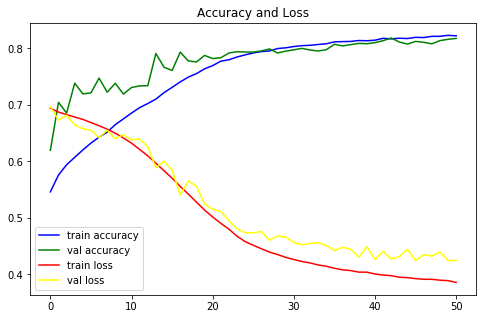

In [419]:
plt.figure(figsize=(8,5))

plt.plot(model3.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3.history.history['loss'], color='red', label='train loss')
plt.plot(model3.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model.evaluate(X_val, y_val)

In [599]:
y_train_pred3 = model3.predict_classes(X_train_up)
y_val_pred3 = model3.predict_classes(X_val)
y_train_prob3 = model3.predict_proba(X_train_up)
y_val_prob3 = model3.predict_proba(X_val)

In [600]:
pd.DataFrame(y_train_prob3).describe()

0
count  38040.000000
mean       0.495286
std        0.345303
min        0.000000
25%        0.139367
50%        0.505096
75%        0.843663
max        1.000000

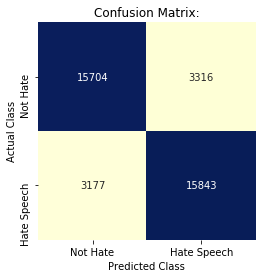

In [601]:
seaborn_confusion_matrix(y_train_up, y_train_pred3)

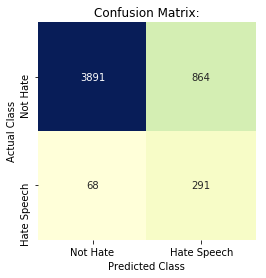

In [602]:
seaborn_confusion_matrix(y_val, y_val_pred3)

In [603]:
compare_classification_metrics(y_train_up, y_train_pred3, y_val, y_val_pred3)

{'Train Accuracy': 0.83,
 'Train Precision': 0.83,
 'Train Recall': 0.83,
 'Train F1': 0.83,
 'Validation Accuracy': 0.82,
 'Validation Precision': 0.25,
 'Validation Recall': 0.81,
 'Validation F1': 0.38}

Adjusted Accuracy: 0.9213922565506453
Adjusted Precision: 0.45146726862302483
Adjusted Recall: 0.5571030640668524
Adjusted F1 Score: 0.4987531172069826




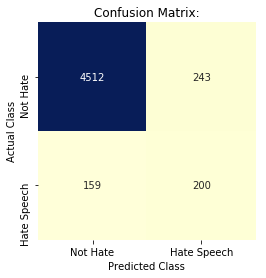

In [604]:
y_adj_val3, cm3 = adjust_threshold_and_score2 (y_val, y_val_prob3, .8, RNN = True)

## RNN 3b - Upsampling   
increased learning rate to .0001 before, which increased adj F1 to .58... now decreasing again.

Decreased learning rate to .00001-->  decreased adjusted F1 to .51

Now increasing learning rate to .001  --> reduced F1 to .42 

(lr=.0001) and batch size 100 -->. adj F1 is .57 -- maybe reduce batch size again?  

 ---> reduced batch size to 50 and got F1 of .58, but graph is all straight lines.... try reducing learning rate again to .00001?  --> curved lines, but reduced F1 to .47 by doing this
 
 now trying to add dropout - add two dropout layers of .01, and got adjusted F1 to .55
 
 now trying to increase dropout to .2

In [571]:
model3b = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3b.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model3b.add(LSTM(32, activation='relu', return_sequences=True))
model3b.add(BatchNormalization())
model3b.add(Dropout(.2))

model3b.add(LSTM(64, activation='relu'))
model3b.add(BatchNormalization())
model3b.add(Dropout(.2))

model3b.add(Dense(1, activation='sigmoid'))

model3b.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.0001), metrics=['accuracy']) 

print(model3b.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_77 (LSTM)               (None, 39, 32)            17024     
_________________________________________________________________
batch_normalization_77 (Batc (None, 39, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 39, 32)            0         
_________________________________________________________________
lstm_78 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_78 (Batc (None, 64)                256       
___________________________

In [572]:
history = model3b.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 237s 6ms/step - loss: 0.5269 - acc: 0.7167 - val_loss: 0.3562 - val_acc: 0.8383
Epoch 2/100
38040/38040 [==============================] - 202s 5ms/step - loss: 0.3675 - acc: 0.8400 - val_loss: 0.3714 - val_acc: 0.8264
Epoch 3/100
38040/38040 [==============================] - 204s 5ms/step - loss: 0.3307 - acc: 0.8592 - val_loss: 0.3530 - val_acc: 0.8311
Epoch 4/100
38040/38040 [==============================] - 202s 5ms/step - loss: 0.3082 - acc: 0.8706 - val_loss: 0.3122 - val_acc: 0.8549
Epoch 5/100
38040/38040 [==============================] - 218s 6ms/step - loss: 0.2939 - acc: 0.8776 - val_loss: 0.3907 - val_acc: 0.8322
Epoch 6/100
38040/38040 [==============================] - 205s 5ms/step - loss: 0.2818 - acc: 0.8859 - val_loss: 0.3357 - val_acc: 0.8533
Epoch 7/100
38040/38040 [==============================] - 207s 5ms/step - loss: 0.2671 - acc: 0.8916 - val_loss: 0.3

5114/5114 [==============================] - 8s 2ms/step


[0.676373367203275, 0.6685569025736373]

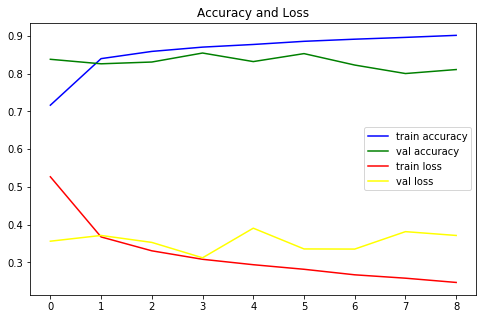

In [573]:
plt.figure(figsize=(8,5))

plt.plot(model3b.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3b.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3b.history.history['loss'], color='red', label='train loss')
plt.plot(model3b.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model.evaluate(X_val, y_val)

In [574]:
y_train_pred3b = model3b.predict_classes(X_train_up)
y_val_pred3b = model3b.predict_classes(X_val)
y_train_prob3b = model3b.predict_proba(X_train_up)
y_val_prob3b = model3b.predict_proba(X_val)

In [575]:
pd.DataFrame(y_train_prob3b).describe()

0
count  38040.000000
mean       0.535045
std        0.400431
min        0.000000
25%        0.038783
50%        0.713904
75%        0.914632
max        1.000000

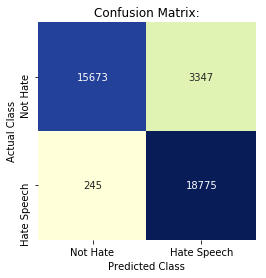

In [576]:
seaborn_confusion_matrix(y_train_up, y_train_pred3b)

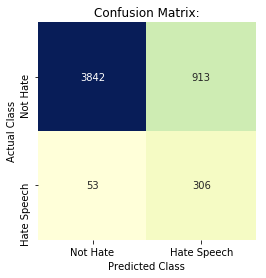

In [577]:
seaborn_confusion_matrix(y_val, y_val_pred3b)

In [578]:
compare_classification_metrics(y_train_up, y_train_pred3b, y_val, y_val_pred3b)

{'Train Accuracy': 0.91,
 'Train Precision': 0.85,
 'Train Recall': 0.99,
 'Train F1': 0.91,
 'Validation Accuracy': 0.81,
 'Validation Precision': 0.25,
 'Validation Recall': 0.85,
 'Validation F1': 0.39}

Adjusted Accuracy: 0.9204145482987877
Adjusted Precision: 0.45698924731182794
Adjusted Recall: 0.7103064066852368
Adjusted F1 Score: 0.5561613958560524




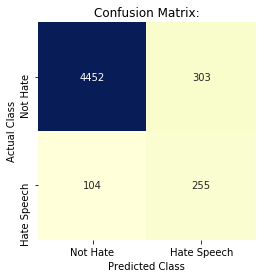

In [583]:
y_adj_val3b, cm3b = adjust_threshold_and_score(y_val, y_val_prob3b, .8, RNN = True)

In [562]:
pd.Series(y_val).value_counts()

0    4755
1     359
dtype: int64

## RNN 3c - upsampling - removing dropout

In [584]:
model3c = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3c.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model3c.add(LSTM(32, activation='relu', return_sequences=True))
model3c.add(BatchNormalization())

model3c.add(LSTM(64, activation='relu'))
model3c.add(BatchNormalization())

model3c.add(Dense(1, activation='sigmoid'))

model3c.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.0001), metrics=['accuracy']) #optimizer=Adam

print(model3c.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_83 (LSTM)               (None, 39, 32)            17024     
_________________________________________________________________
batch_normalization_83 (Batc (None, 39, 32)            128       
_________________________________________________________________
lstm_84 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_84 (Batc (None, 64)                256       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 3,821,805
Trainable params: 42,113
Non-trainable params: 3,779,692
_____________________________________________________________

In [585]:
history = model3c.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 185s 5ms/step - loss: 0.4422 - acc: 0.7982 - val_loss: 0.4186 - val_acc: 0.8185
Epoch 2/100
38040/38040 [==============================] - 206s 5ms/step - loss: 0.3379 - acc: 0.8552 - val_loss: 0.3472 - val_acc: 0.8426
Epoch 3/100
38040/38040 [==============================] - 185s 5ms/step - loss: 0.3014 - acc: 0.8734 - val_loss: 0.2808 - val_acc: 0.8876
Epoch 4/100
38040/38040 [==============================] - 191s 5ms/step - loss: 0.2753 - acc: 0.8860 - val_loss: 0.4336 - val_acc: 0.8031
Epoch 5/100
38040/38040 [==============================] - 198s 5ms/step - loss: 0.2543 - acc: 0.8971 - val_loss: 0.3358 - val_acc: 0.8530
Epoch 6/100
38040/38040 [==============================] - 194s 5ms/step - loss: 0.2351 - acc: 0.9067 - val_loss: 0.3363 - val_acc: 0.8549
Epoch 7/100
38040/38040 [==============================] - 206s 5ms/step - loss: 0.2164 - acc: 0.9154 - val_loss: 0.3

5114/5114 [==============================] - 15s 3ms/step


[0.6931705802830579, 0.6177160736169021]

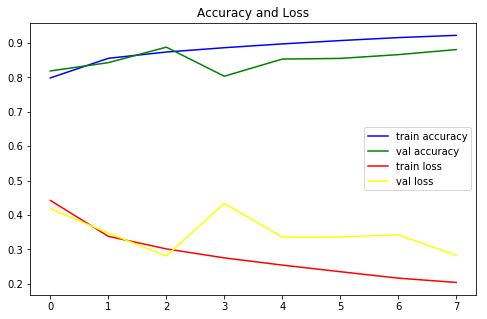

In [586]:
plt.figure(figsize=(8,5))

plt.plot(model3c.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3c.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3c.history.history['loss'], color='red', label='train loss')
plt.plot(model3c.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model.evaluate(X_val, y_val)

In [587]:
y_train_pred3c = model3c.predict_classes(X_train_up)
y_val_pred3c = model3c.predict_classes(X_val)
y_train_prob3c = model3c.predict_proba(X_train_up)
y_val_prob3c = model3c.predict_proba(X_val)

In [588]:
pd.DataFrame(y_train_prob3c).describe()

0
count  38040.000000
mean       0.504510
std        0.430768
min        0.000000
25%        0.013415
50%        0.659358
75%        0.939457
max        1.000000

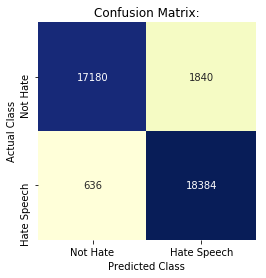

In [589]:
seaborn_confusion_matrix(y_train_up, y_train_pred3c)

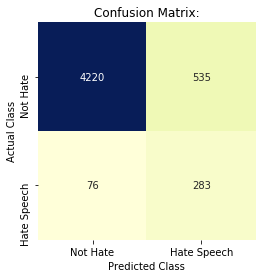

In [590]:
seaborn_confusion_matrix(y_val, y_val_pred3c)

In [591]:
compare_classification_metrics(y_train_up, y_train_pred3c, y_val, y_val_pred3c)

{'Train Accuracy': 0.93,
 'Train Precision': 0.91,
 'Train Recall': 0.97,
 'Train F1': 0.94,
 'Validation Accuracy': 0.88,
 'Validation Precision': 0.35,
 'Validation Recall': 0.79,
 'Validation F1': 0.48}

Adjusted Accuracy: 0.9417285881892843
Adjusted Precision: 0.5844875346260388
Adjusted Recall: 0.5877437325905293
Adjusted F1 Score: 0.5861111111111111




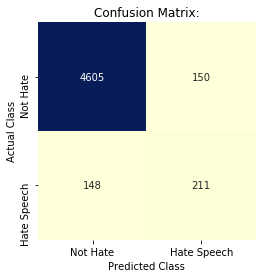

In [598]:
y_adj_val3c, cm3c = adjust_threshold_and_score(y_val, y_val_prob3c, .89, RNN = True)

## RNN 3d - upsampling;  using 3c parameters + Adam optimizer

In [607]:
model3d = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3d.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model3d.add(LSTM(32, activation='relu', return_sequences=True))
model3d.add(BatchNormalization())

model3d.add(LSTM(64, activation='relu'))
model3d.add(BatchNormalization())

model3d.add(Dense(1, activation='sigmoid'))

model3d.compile(loss='binary_crossentropy', optimizer = Adam(lr=.0001), metrics=['accuracy'])

print(model3d.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_47 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_91 (LSTM)               (None, 39, 32)            17024     
_________________________________________________________________
batch_normalization_91 (Batc (None, 39, 32)            128       
_________________________________________________________________
lstm_92 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_92 (Batc (None, 64)                256       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 65        
Total params: 3,821,805
Trainable params: 42,113
Non-trainable params: 3,779,692
_____________________________________________________________

In [608]:
history = model3d.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 226s 6ms/step - loss: 0.4554 - acc: 0.7767 - val_loss: 0.4917 - val_acc: 0.8037
Epoch 2/100
38040/38040 [==============================] - 203s 5ms/step - loss: 0.3518 - acc: 0.8468 - val_loss: 0.3951 - val_acc: 0.8477
Epoch 3/100
38040/38040 [==============================] - 211s 6ms/step - loss: 0.3294 - acc: 0.8586 - val_loss: 0.4644 - val_acc: 0.7734
Epoch 4/100
38040/38040 [==============================] - 217s 6ms/step - loss: 0.3102 - acc: 0.8686 - val_loss: 0.3277 - val_acc: 0.8459
Epoch 5/100
38040/38040 [==============================] - 201s 5ms/step - loss: 0.2930 - acc: 0.8769 - val_loss: 0.2754 - val_acc: 0.8749
Epoch 6/100
38040/38040 [==============================] - 208s 5ms/step - loss: 0.2712 - acc: 0.8884 - val_loss: 0.1903 - val_acc: 0.9249
Epoch 7/100
38040/38040 [==============================] - 204s 5ms/step - loss: 0.2538 - acc: 0.8984 - val_loss: 0.3

5114/5114 [==============================] - 9s 2ms/step


[0.6931705802830579, 0.6177160736169021]

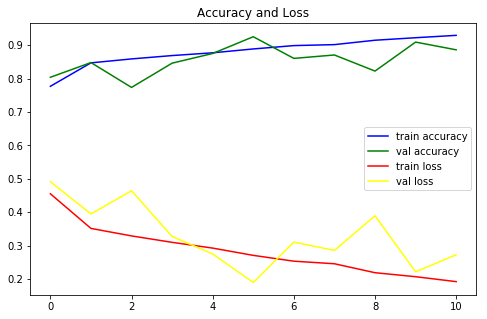

In [609]:
plt.figure(figsize=(8,5))

plt.plot(model3d.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3d.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3d.history.history['loss'], color='red', label='train loss')
plt.plot(model3d.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model.evaluate(X_val, y_val)

In [610]:
y_train_pred3d = model3d.predict_classes(X_train_up)
y_val_pred3d = model3d.predict_classes(X_val)
y_train_prob3d = model3d.predict_proba(X_train_up)
y_val_prob3d = model3d.predict_proba(X_val)

In [611]:
pd.DataFrame(y_train_prob3d).describe()

0
count  38040.000000
mean       0.498005
std        0.426075
min        0.000000
25%        0.015658
50%        0.690420
75%        0.919391
max        1.000000

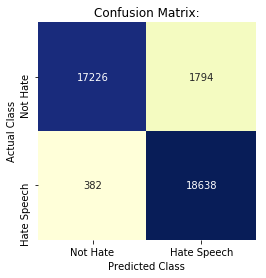

In [612]:
seaborn_confusion_matrix(y_train_up, y_train_pred3d)

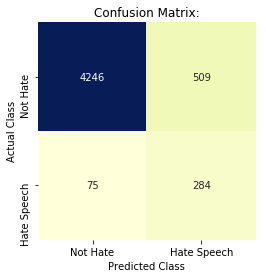

In [613]:
seaborn_confusion_matrix(y_val, y_val_pred3d)

In [614]:
compare_classification_metrics(y_train_up, y_train_pred3d, y_val, y_val_pred3d)

{'Train Accuracy': 0.94,
 'Train Precision': 0.91,
 'Train Recall': 0.98,
 'Train F1': 0.94,
 'Validation Accuracy': 0.89,
 'Validation Precision': 0.36,
 'Validation Recall': 0.79,
 'Validation F1': 0.49}

Adjusted Accuracy: 0.9342980054751662
Adjusted Precision: 0.5271867612293144
Adjusted Recall: 0.6211699164345403
Adjusted F1 Score: 0.5703324808184144




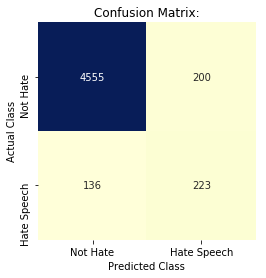

In [621]:
y_adj_val3d, cm3d = adjust_threshold_and_score(y_val, y_val_prob3d, .84, RNN = True)

## RNN 3e - using lr = .00001, rmsprop optimizer... doubled LSTM units

- highest achieved adjusted F1 was .51

In [637]:
model3e = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3e.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model3e.add(LSTM(128, activation='relu', return_sequences=True))
model3e.add(BatchNormalization())

model3e.add(LSTM(256, activation='relu'))
model3e.add(BatchNormalization())

model3e.add(Dense(1, activation='sigmoid'))

model3e.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.0001), metrics=['accuracy']) #optimizer=Adam

print(model3e.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_49 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_95 (LSTM)               (None, 39, 128)           117248    
_________________________________________________________________
batch_normalization_95 (Batc (None, 39, 128)           512       
_________________________________________________________________
lstm_96 (LSTM)               (None, 256)               394240    
_________________________________________________________________
batch_normalization_96 (Batc (None, 256)               1024      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 257       
Total params: 4,292,781
Trainable params: 512,513
Non-trainable params: 3,780,268
____________________________________________________________

In [638]:
history = model3e.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 405s 11ms/step - loss: 0.3979 - acc: 0.8201 - val_loss: 0.5273 - val_acc: 0.8103
Epoch 2/100
38040/38040 [==============================] - 2619s 69ms/step - loss: 0.3584 - acc: 0.8421 - val_loss: 0.4061 - val_acc: 0.8727
Epoch 3/100
38040/38040 [==============================] - 1220s 32ms/step - loss: 0.3955 - acc: 0.8310 - val_loss: 0.7091 - val_acc: 0.8837
Epoch 4/100
38040/38040 [==============================] - 426s 11ms/step - loss: 0.4356 - acc: 0.7996 - val_loss: 0.5498 - val_acc: 0.8600
Epoch 5/100
38040/38040 [==============================] - 436s 11ms/step - loss: 0.4793 - acc: 0.7788 - val_loss: 0.5613 - val_acc: 0.7667
Epoch 6/100
38040/38040 [==============================] - 412s 11ms/step - loss: 0.4021 - acc: 0.8203 - val_loss: 0.4811 - val_acc: 0.7681
Epoch 7/100
38040/38040 [==============================] - 422s 11ms/step - loss: 0.3690 - acc: 0.8383 - val_

5114/5114 [==============================] - 16s 3ms/step


[0.40726514905982525, 0.8987094249676856]

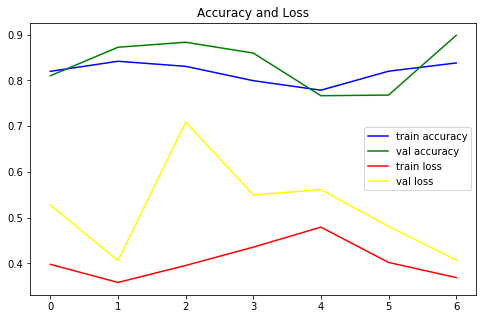

In [639]:
plt.figure(figsize=(8,5))

plt.plot(model3e.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3e.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3e.history.history['loss'], color='red', label='train loss')
plt.plot(model3e.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model3e.evaluate(X_val, y_val)

In [640]:
y_train_pred3e = model3e.predict_classes(X_train_up)
y_val_pred3e = model3e.predict_classes(X_val)
y_train_prob3e = model3e.predict_proba(X_train_up)
y_val_prob3e = model3e.predict_proba(X_val)

In [641]:
pd.DataFrame(y_train_prob3e).describe()

0
count  38040.000000
mean       0.419777
std        0.191888
min        0.000000
25%        0.255755
50%        0.441103
75%        0.574387
max        1.000000

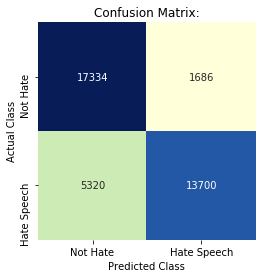

In [642]:
seaborn_confusion_matrix(y_train_up, y_train_pred3e)

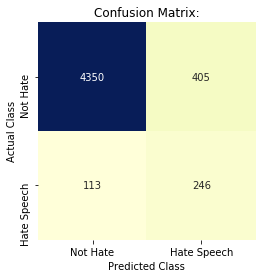

In [643]:
seaborn_confusion_matrix(y_val, y_val_pred3e)

In [661]:
compare_classification_metrics(y_train_up, y_train_pred3e, y_val, y_val_pred3e)

{'Train Accuracy': 0.82,
 'Train Precision': 0.89,
 'Train Recall': 0.72,
 'Train F1': 0.8,
 'Validation Accuracy': 0.9,
 'Validation Precision': 0.38,
 'Validation Recall': 0.69,
 'Validation F1': 0.49}

Adjusted Accuracy: 0.8987094251075479
Adjusted Precision: 0.3778801843317972
Adjusted Recall: 0.6852367688022284
Adjusted F1 Score: 0.4871287128712871




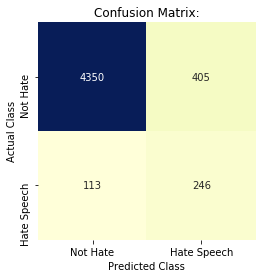

In [656]:
y_adj_val3e, cm3e = adjust_threshold_and_score(y_val, y_val_prob3e, .5, RNN = True)

## RNN 3f - upsampling - reducing to one layer LSTM 

In [662]:
model3f = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3f.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

# model3f.add(LSTM(32, activation='relu', return_sequences=True))
# model3f.add(BatchNormalization())

model3f.add(LSTM(64, activation='relu'))
model3f.add(BatchNormalization())

model3f.add(Dense(1, activation='sigmoid'))

model3f.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.0001), metrics=['accuracy']) #optimizer=Adam

print(model3f.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_52 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_99 (LSTM)               (None, 64)                42240     
_________________________________________________________________
batch_normalization_99 (Batc (None, 64)                256       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 65        
Total params: 3,822,061
Trainable params: 42,433
Non-trainable params: 3,779,628
_________________________________________________________________
None


In [663]:
history = model3f.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 142s 4ms/step - loss: 0.4580 - acc: 0.7885 - val_loss: 0.3391 - val_acc: 0.8553
Epoch 2/100
38040/38040 [==============================] - 103s 3ms/step - loss: 0.3346 - acc: 0.8637 - val_loss: 0.3943 - val_acc: 0.8140
Epoch 3/100
38040/38040 [==============================] - 207s 5ms/step - loss: 0.3046 - acc: 0.8767 - val_loss: 0.3453 - val_acc: 0.8428
Epoch 4/100
38040/38040 [==============================] - 179s 5ms/step - loss: 0.2837 - acc: 0.8871 - val_loss: 0.3690 - val_acc: 0.8238
Epoch 5/100
38040/38040 [==============================] - 314s 8ms/step - loss: 0.2676 - acc: 0.8956 - val_loss: 0.2597 - val_acc: 0.8966
Epoch 6/100
38040/38040 [==============================] - 132s 3ms/step - loss: 0.2535 - acc: 0.9021 - val_loss: 0.1981 - val_acc: 0.9298
Epoch 7/100
38040/38040 [==============================] - 126s 3ms/step - loss: 0.2387 - acc: 0.9099 - val_loss: 0.3

5114/5114 [==============================] - 6s 1ms/step


[0.1978020102053729, 0.9331247555729371]

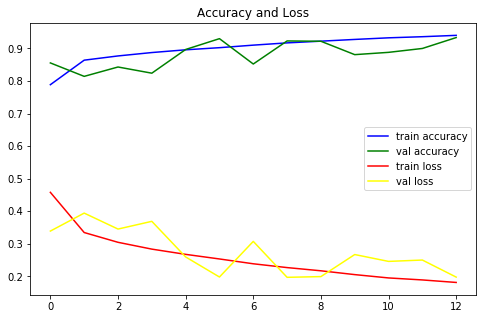

In [664]:
plt.figure(figsize=(8,5))

plt.plot(model3f.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3f.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3f.history.history['loss'], color='red', label='train loss')
plt.plot(model3f.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model3f.evaluate(X_val, y_val)

In [665]:
y_train_pred3f = model3f.predict_classes(X_train_up)
y_val_pred3f = model3f.predict_classes(X_val)
y_train_prob3f = model3f.predict_proba(X_train_up)
y_val_prob3f = model3f.predict_proba(X_val)

In [666]:
pd.DataFrame(y_train_prob3f).describe()

0
count  38040.000000
mean       0.406776
std        0.327530
min        0.000000
25%        0.079190
50%        0.363966
75%        0.731913
max        0.999998

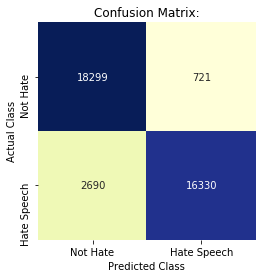

In [667]:
seaborn_confusion_matrix(y_train_up, y_train_pred3f)

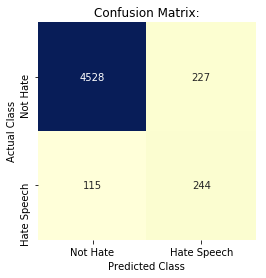

In [668]:
seaborn_confusion_matrix(y_val, y_val_pred3f)

In [669]:
compare_classification_metrics(y_train_up, y_train_pred3f, y_val, y_val_pred3f)

{'Train Accuracy': 0.91,
 'Train Precision': 0.96,
 'Train Recall': 0.86,
 'Train F1': 0.91,
 'Validation Accuracy': 0.93,
 'Validation Precision': 0.52,
 'Validation Recall': 0.68,
 'Validation F1': 0.59}

Adjusted Accuracy: 0.9489636292530309
Adjusted Precision: 0.6737588652482269
Adjusted Recall: 0.5292479108635098
Adjusted F1 Score: 0.5928237129485179




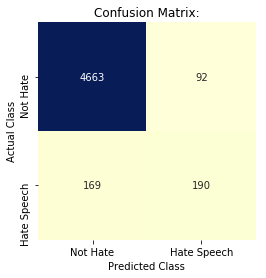

In [692]:
y_adj_val3f, cm3f = adjust_threshold_and_score(y_val, y_val_prob3f, .7, RNN = True)

## RNN 3g - upsampling with just 1 layer, increasing batch size to 100

-- got F1 up to .6 without adjustment (adjustment didn't increase F1).  Now trying to decrease learning rate to .00001 again to see if it helps, since the validation loss and accuracy is bumpy

In [716]:
model3g = Sequential()

filepath = 'results/RNN/weights.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', patience = 5),
             ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)]

model3g.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

# model3f.add(LSTM(32, activation='relu', return_sequences=True))
# model3f.add(BatchNormalization())

model3g.add(LSTM(64, activation='relu'))
model3g.add(BatchNormalization())

model3g.add(Dense(1, activation='sigmoid'))

model3g.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.00001), metrics=['accuracy']) 

print(model3g.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_55 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_102 (LSTM)              (None, 64)                42240     
_________________________________________________________________
batch_normalization_102 (Bat (None, 64)                256       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 65        
Total params: 3,822,061
Trainable params: 42,433
Non-trainable params: 3,779,628
_________________________________________________________________
None


In [717]:
history = model3g.fit(X_train_up, 
                    y_train_up,
                    epochs=100,
                    batch_size=200,
                    callbacks=callbacks,
                    validation_data=(X_val, y_val))

Train on 38040 samples, validate on 5114 samples
Epoch 1/100
38040/38040 [==============================] - 73s 2ms/step - loss: 0.6920 - acc: 0.5264 - val_loss: 0.6888 - val_acc: 0.3459
Epoch 2/100
38040/38040 [==============================] - 53s 1ms/step - loss: 0.6902 - acc: 0.5754 - val_loss: 0.6854 - val_acc: 0.5346
Epoch 3/100
38040/38040 [==============================] - 49s 1ms/step - loss: 0.6871 - acc: 0.6397 - val_loss: 0.6745 - val_acc: 0.8588
Epoch 4/100
38040/38040 [==============================] - 45s 1ms/step - loss: 0.6799 - acc: 0.6923 - val_loss: 0.6507 - val_acc: 0.9073
Epoch 5/100
38040/38040 [==============================] - 45s 1ms/step - loss: 0.6644 - acc: 0.7137 - val_loss: 0.6166 - val_acc: 0.8840
Epoch 6/100
38040/38040 [==============================] - 45s 1ms/step - loss: 0.6316 - acc: 0.7288 - val_loss: 0.5601 - val_acc: 0.7937
Epoch 7/100
38040/38040 [==============================] - 47s 1ms/step - loss: 0.5790 - acc: 0.7426 - val_loss: 0.5827 - v

5114/5114 [==============================] - 6s 1ms/step


[0.3128880348681564, 0.8633163862504388]

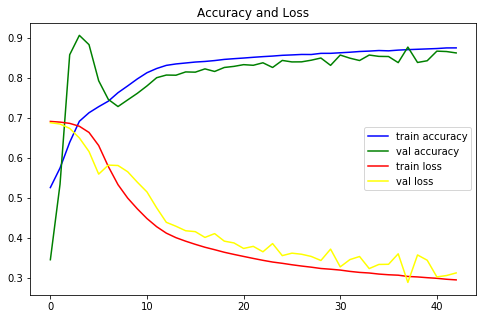

In [718]:
plt.figure(figsize=(8,5))

plt.plot(model3g.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model3g.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model3g.history.history['loss'], color='red', label='train loss')
plt.plot(model3g.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model3g.evaluate(X_val, y_val)

In [719]:
y_train_pred3g = model3g.predict_classes(X_train_up)
y_val_pred3g = model3g.predict_classes(X_val)
y_train_prob3g = model3g.predict_proba(X_train_up)
y_val_prob3g = model3g.predict_proba(X_val)

In [720]:
pd.DataFrame(y_train_prob3g).describe()

0
count  38040.000000
mean       0.489181
std        0.365658
min        0.000000
25%        0.087371
50%        0.518369
75%        0.877598
max        0.993377

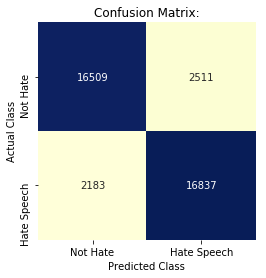

In [721]:
seaborn_confusion_matrix(y_train_up, y_train_pred3g)

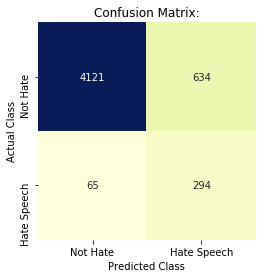

In [722]:
seaborn_confusion_matrix(y_val, y_val_pred3g)

In [723]:
compare_classification_metrics(y_train_up, y_train_pred3g, y_val, y_val_pred3g)

{'Train Accuracy': 0.88,
 'Train Precision': 0.87,
 'Train Recall': 0.89,
 'Train F1': 0.88,
 'Validation Accuracy': 0.86,
 'Validation Precision': 0.32,
 'Validation Recall': 0.82,
 'Validation F1': 0.46}

Adjusted Accuracy: 0.9333202972233086
Adjusted Precision: 0.5214285714285715
Adjusted Recall: 0.6100278551532033
Adjusted F1 Score: 0.5622593068035944




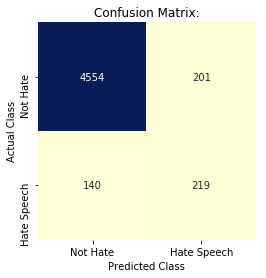

In [724]:
y_adj_val3g, cm3g = adjust_threshold_and_score(y_val, y_val_prob3g, .8, RNN = True)

## RNN 4 - class weight balanced

In [441]:
model4 = Sequential()

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

best_model_path = 'results/RNN/weights_model4.best.hdf5'

callbacks = [EarlyStopping(monitor='val_loss', patience = 5), 
             ReduceLROnPlateau(monitor='val_loss', factor = 0.1, patience = 5),
             ModelCheckpoint(best_model_path, save_best_only = True, save_weights_only = True)]

model4.add(Embedding(num_words, 100, weights=[embedding_matrix], input_length= 39, trainable=False))

model4.add(LSTM(32, activation='relu', return_sequences=True))
model4.add(BatchNormalization())

model4.add(LSTM(64, activation='relu'))
model4.add(BatchNormalization())

model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer = rmsprop(lr=.000001), metrics=['accuracy'])

print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 39, 100)           3779500   
_________________________________________________________________
lstm_59 (LSTM)               (None, 39, 32)            17024     
_________________________________________________________________
batch_normalization_59 (Batc (None, 39, 32)            128       
_________________________________________________________________
lstm_60 (LSTM)               (None, 64)                24832     
_________________________________________________________________
batch_normalization_60 (Batc (None, 64)                256       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 65        
Total params: 3,821,805
Trainable params: 42,113
Non-trainable params: 3,779,692
_____________________________________________________________

In [442]:
history = model4.fit(X_train, 
                    y_train,
                    epochs=100,
                    batch_size=50,
                    callbacks=callbacks,
                    class_weight=class_weights,
                    validation_data=(X_val, y_val))

Train on 20455 samples, validate on 5114 samples
Epoch 1/100
20455/20455 [==============================] - 137s 7ms/step - loss: 0.7319 - acc: 0.3837 - val_loss: 0.7725 - val_acc: 0.5853
Epoch 2/100
20455/20455 [==============================] - 101s 5ms/step - loss: 0.7251 - acc: 0.4085 - val_loss: 0.7536 - val_acc: 0.8991
Epoch 3/100
20455/20455 [==============================] - 115s 6ms/step - loss: 0.7203 - acc: 0.4206 - val_loss: 0.7371 - val_acc: 0.9046
Epoch 4/100
20455/20455 [==============================] - 115s 6ms/step - loss: 0.7176 - acc: 0.4300 - val_loss: 0.7621 - val_acc: 0.9050
Epoch 5/100
20455/20455 [==============================] - 112s 5ms/step - loss: 0.7140 - acc: 0.4328 - val_loss: 0.7556 - val_acc: 0.9052
Epoch 6/100
20455/20455 [==============================] - 112s 5ms/step - loss: 0.7117 - acc: 0.4729 - val_loss: 0.7367 - val_acc: 0.9089
Epoch 7/100
20455/20455 [==============================] - 111s 5ms/step - loss: 0.7079 - acc: 0.4649 - val_loss: 0.7

5114/5114 [==============================] - 9s 2ms/step


[0.6796727768834979, 0.9168947986387209]

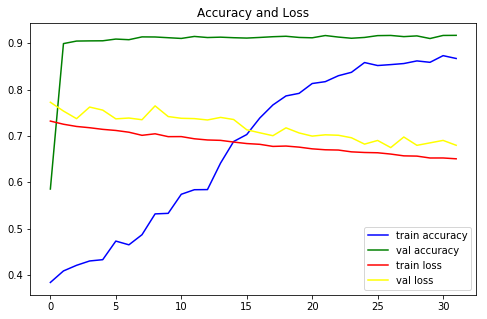

In [632]:
plt.figure(figsize=(8,5))

plt.plot(model4.history.history['acc'], color='blue', label='train accuracy')
plt.plot(model4.history.history['val_acc'], color='green', label='val accuracy')

plt.plot(model4.history.history['loss'], color='red', label='train loss')
plt.plot(model4.history.history['val_loss'], color = 'yellow', label='val loss')

plt.title("Accuracy and Loss")
plt.legend()

model4.evaluate(X_val, y_val)

In [449]:
y_train_pred4 = model4.predict_classes(X_train)
y_val_pred4 = model4.predict_classes(X_val)
y_train_prob4 = model4.predict_proba(X_train)
y_val_prob4 = model4.predict_proba(X_val)

In [445]:
pd.DataFrame(y_train_prob4).describe()

0
count  20455.000000
mean       0.463742
std        0.064348
min        0.000000
25%        0.463626
50%        0.465182
75%        0.466881
max        1.000000

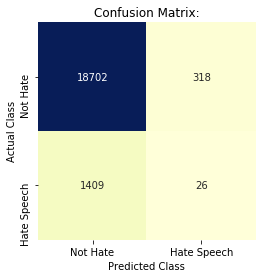

In [447]:
seaborn_confusion_matrix(y_train, y_train_pred4)

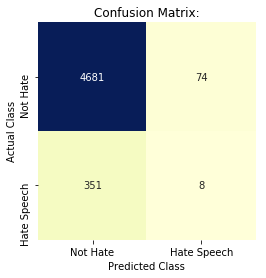

In [451]:
seaborn_confusion_matrix(y_val, y_val_pred4)

Adjusted Accuracy: 0.9168947985921001
Adjusted Precision: 0.0975609756097561
Adjusted Recall: 0.022284122562674095
Adjusted F1 Score: 0.036281179138321996




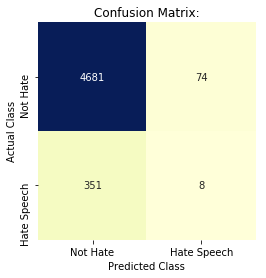

In [455]:
y_adj_val4, cm4 = adjust_threshold_and_score(y_val, y_val_prob4, .5, RNN = True)

# Building Word 2 Vec

In [ ]:
from time import time
t = time()

RNN_w2v_model = gensim.models.Word2Vec(X_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
RNN_w2v_model.build_vocab

In [ ]:
RNN_w2v_model.train(X_token_list, total_examples=RNN_w2v_model.corpus_count, epochs=RNN_w2v_model.epochs)

In [ ]:
RNN_w2v_model.save('data/RNN_w2v.model')

In [30]:
RNN_w2v_model = gensim.models.Word2Vec.load('data/RNN_w2v.model')

In [ ]:
RNN_w2v_model.vocabulary

In [ ]:
X_avg_vectors = np.concatenate([avg_word_vectors(word, RNN_w2v_model) for word in X_token_list])

In [ ]:
X_avg_vectors.shape